![](https://mandayahospitalgroup.com/wp-content/uploads/2024/05/diabetes.jpg)

In [ ]:
# Rizki Khaerul Padli (22.11.5301)
# M Farrel Rashendriya Akbar (22.11.5269)
# UAS Kecerdasan Buatan Lanjut
# Dosen Pengampu : Ainul Yaqin, M.Kom

**Link Youtube Presentasi : [teks link](https://)**

# **Tujuan Utama**

- Tujuan Penelitian ini dilakukan untuk Memprediksi apakah seseorang menderita diabetes ketika karakteristiknya ditentukan untuk mengembangkan model pembelajaran mesin yang mampu belajar dari model pembelajaran mesin.

# **Dataset Story**

- Kumpulan data ini merupakan bagian dari kumpulan data lebih besar yang disimpan di Institut Nasional Penyakit Diabetes-Pencernaan-Ginjal di AS. Di AS
  Wanita Indian Pima berusia 21 tahun ke atas tinggal di Phoenix, kota terbesar ke-5 di Negara Bagian Arizona
  adalah data yang digunakan untuk penelitian diabetes.
  
- Variabel target ditentukan sebagai "hasil", dimana 1 menunjukkan hasil tes diabetes positif dan 0 menunjukkan hasil negatif.

- **Kehamilan:** Jumlah kehamilan

- **Glukosa:** Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral

- **Tekanan Darah:** Tekanan Darah (tekanan darah kecil) (mm Hg)

- **Ketebalan Kulit:** Ketebalan Kulit

- **Insulin:** Insulin serum 2 jam (mu U/ml)

- **DiabetesPedigreeFungsi:** Fungsi (konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral)

- **BMI:** Indeks massa tubuh

- **Usia:** Usia (tahun)

- **Hasil:** Menderita penyakit (1) atau tidak (0)

# **1. Import Library yang di butuhkan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action="ignore")


# **2. Menyesuaikan Pengaturan Kolom dan Baris**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Load Dataset**

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  \
0            6      148             72             35        0 33.600                     0.627   
1            1       85             66             29        0 26.600                     0.351   
2            8      183             64              0        0 23.300                     0.672   
3            1       89             66             23       94 28.100                     0.167   
4            0      137             40             35      168 43.100                     2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                

# **4. Data Cleaning,Normalization & EDA**

Data Cleaning

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Menghapus nilai-nilai yang tidak sesuai atau 0 pada kolom tertentu (kecuali 'Pregnancies' dan 'Outcome')
def clean_data(dataframe):
    columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in columns_to_clean:
        median_value = dataframe[col].replace(0, pd.NA).median()  # Mengganti 0 dengan NA, lalu menghitung median
        dataframe[col].replace(0, median_value, inplace=True)  # Mengganti nilai 0 dengan median
    return dataframe

Normalization

In [ ]:
# Normalisasi data menggunakan Min-Max Scaler
def normalize_data(dataframe):
    scaler = MinMaxScaler()
    columns_to_scale = dataframe.columns.difference(['Outcome'])  # Jangan normalisasi kolom target
    dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])
    return dataframe

# Cleaning data
df_cleaned = clean_data(df)

# Normalisasi data
df_normalized = normalize_data(df_cleaned)

# Menampilkan 5 baris pertama hasil
print(df_normalized.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   

    Age  Outcome  
0 0.483        1  
1 0.167        0  
2 0.183        1  
3 0.000        0  
4 0.200        1  


In [ ]:
def check_df(dataframe, head=5):
    print("=" * 50)
    print("Shape".center(50))
    print("=" * 50)
    print(dataframe.shape)

    print("=" * 50)
    print("Data Types".center(50))
    print("=" * 50)
    print(dataframe.dtypes)

    print("=" * 50)
    print("First Rows (Head)".center(50))
    print("=" * 50)
    print(dataframe.head(head))

    print("=" * 50)
    print("Last Rows (Tail)".center(50))
    print("=" * 50)
    print(dataframe.tail(head))

    print("=" * 50)
    print("Missing Values (NA)".center(50))
    print("=" * 50)
    print(dataframe.isnull().sum())

    print("=" * 50)
    print("Quantiles".center(50))
    print("=" * 50)
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# Menggunakan fungsi
check_df(df)


                      Shape                       
(768, 9)
                    Data Types                    
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
                First Rows (Head)                 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0

# **5. Mendeteksi Variabel Numerik dan Kategorikal**

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Mengembalikan nama-nama kolom kategorikal, numerik, dan kategorikal tetapi cardinal dalam dataset.

    Parameters:
    ----------
    dataframe : pandas.DataFrame
        DataFrame yang akan dievaluasi.
    cat_th : int, optional
        Ambang batas untuk menentukan kolom numerik sebagai kategorikal.
    car_th : int, optional
        Ambang batas untuk menentukan kolom kategorikal sebagai cardinal.

    Returns:
    -------
    cat_cols : list
        Daftar kolom kategorikal.
    num_cols : list
        Daftar kolom numerik.
    cat_but_car : list
        Daftar kolom kategorikal tetapi cardinal.
    num_but_cat : list
        Daftar kolom numerik tetapi diperlakukan sebagai kategorikal.
    """

    # Kategori kolom
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Kolom numerik
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Menampilkan informasi
    print("=" * 50)
    print(f"Jumlah Observasi : {dataframe.shape[0]}")
    print(f"Jumlah Variabel  : {dataframe.shape[1]}")
    print("=" * 50)
    print(f'Jumlah cat_cols  : {len(cat_cols)} | {cat_cols}')
    print(f'Jumlah num_cols  : {len(num_cols)} | {num_cols}')
    print(f'Jumlah cat_but_car: {len(cat_but_car)} | {cat_but_car}')
    print(f'Jumlah num_but_cat: {len(num_but_cat)} | {num_but_cat}')
    print("=" * 50)

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Jumlah Observasi : 768
Jumlah Variabel  : 9
Jumlah cat_cols  : 1 | ['Outcome']
Jumlah num_cols  : 8 | ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Jumlah cat_but_car: 0 | []
Jumlah num_but_cat: 1 | ['Outcome']


In [ ]:
cat_cols

['Outcome']

In [ ]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
cat_but_car

[]

In [ ]:
num_but_cat

['Outcome']

# **6. Analisis Variabel Kategorikal**

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("=" * 50)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


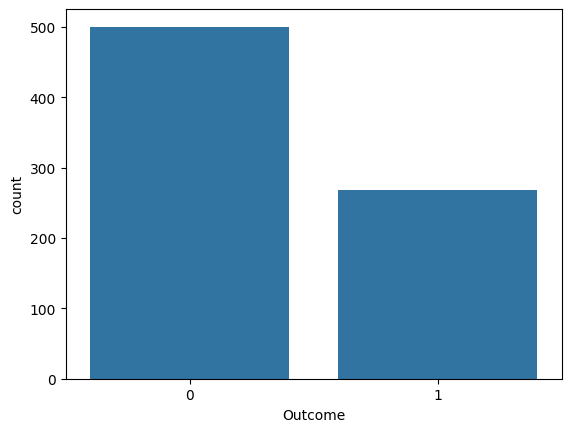

In [ ]:
cat_summary(df, "Outcome", plot=True)

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


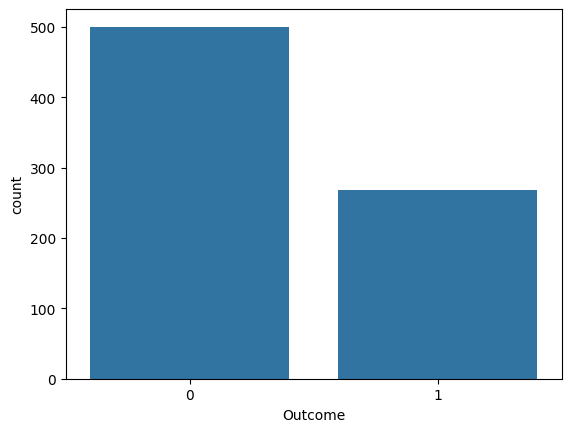

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# **7. Analisis Variabel Numerik**

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   768.000
mean      0.226
std       0.198
min       0.000
5%        0.000
10%       0.000
20%       0.059
30%       0.059
40%       0.118
50%       0.176
60%       0.235
70%       0.294
80%       0.412
90%       0.529
95%       0.588
99%       0.765
max       1.000
Name: Pregnancies, dtype: float64


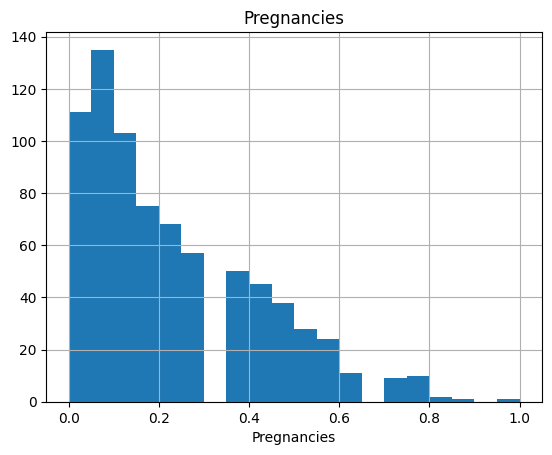

count   768.000
mean      0.501
std       0.196
min       0.000
5%        0.232
10%       0.275
20%       0.329
30%       0.375
40%       0.419
50%       0.471
60%       0.523
70%       0.581
80%       0.665
90%       0.794
95%       0.884
99%       0.981
max       1.000
Name: Glucose, dtype: float64


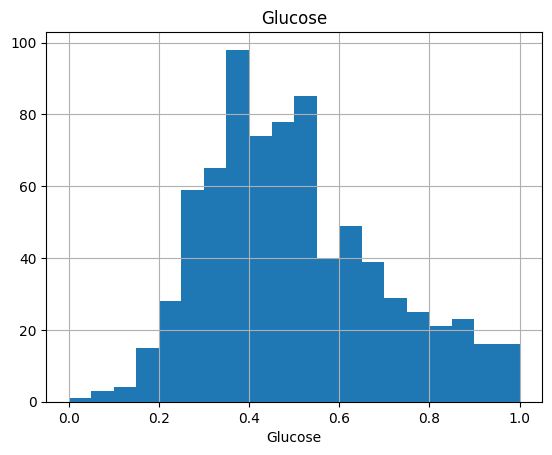

count   768.000
mean      0.494
std       0.123
min       0.000
5%        0.286
10%       0.347
20%       0.388
30%       0.429
40%       0.469
50%       0.490
60%       0.510
70%       0.551
80%       0.592
90%       0.653
95%       0.673
99%       0.837
max       1.000
Name: BloodPressure, dtype: float64


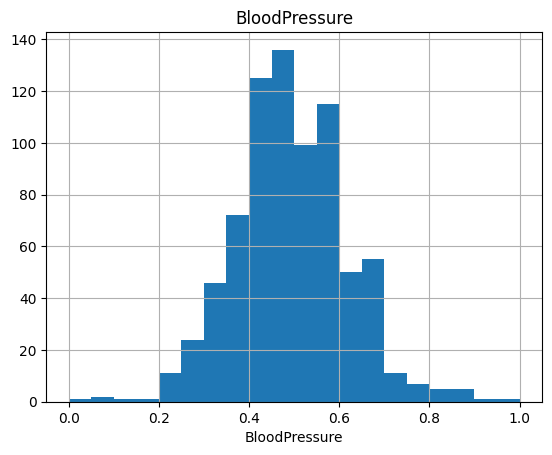

count   768.000
mean      0.240
std       0.096
min       0.000
5%        0.080
10%       0.120
20%       0.174
30%       0.217
40%       0.239
50%       0.239
60%       0.239
70%       0.261
80%       0.304
90%       0.359
95%       0.402
99%       0.482
max       1.000
Name: SkinThickness, dtype: float64


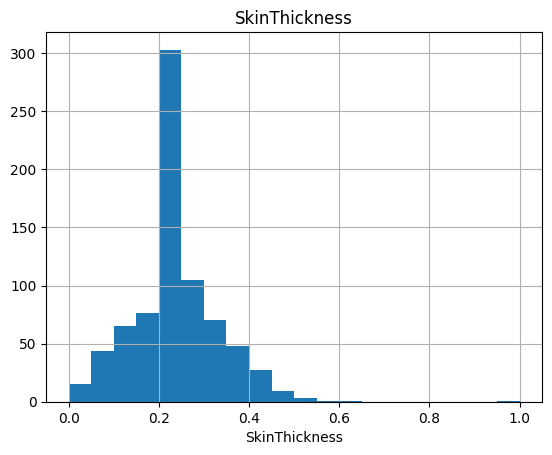

count   768.000
mean      0.152
std       0.104
min       0.000
5%        0.043
10%       0.064
20%       0.109
30%       0.133
40%       0.133
50%       0.133
60%       0.133
70%       0.133
80%       0.163
90%       0.236
95%       0.335
99%       0.608
max       1.000
Name: Insulin, dtype: float64


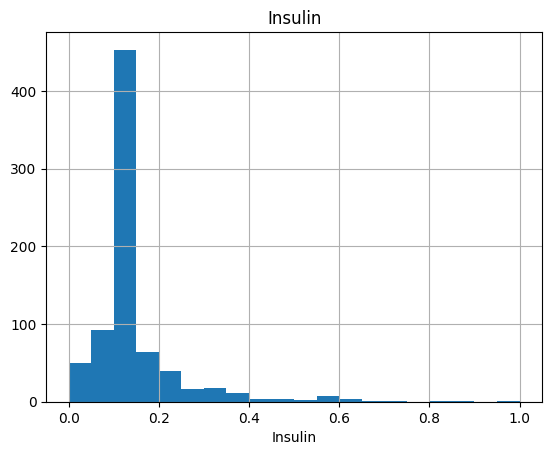

count   768.000
mean      0.292
std       0.141
min       0.000
5%        0.083
10%       0.119
20%       0.164
30%       0.211
40%       0.249
50%       0.288
60%       0.317
70%       0.354
80%       0.401
90%       0.476
95%       0.536
99%       0.666
max       1.000
Name: BMI, dtype: float64


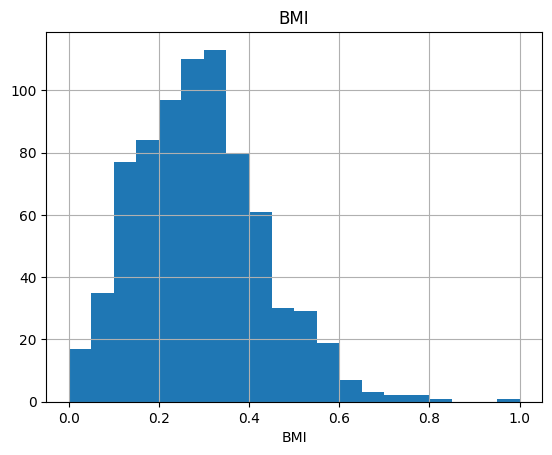

count   768.000
mean      0.168
std       0.141
min       0.000
5%        0.027
10%       0.037
20%       0.060
30%       0.077
40%       0.096
50%       0.126
60%       0.161
70%       0.207
80%       0.260
90%       0.342
95%       0.450
99%       0.692
max       1.000
Name: DiabetesPedigreeFunction, dtype: float64


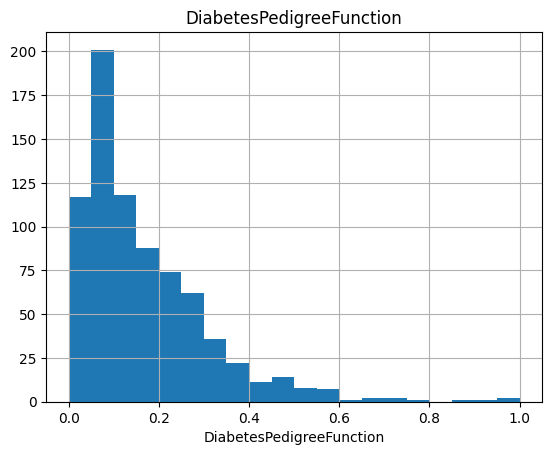

count   768.000
mean      0.204
std       0.196
min       0.000
5%        0.000
10%       0.017
20%       0.033
30%       0.067
40%       0.100
50%       0.133
60%       0.200
70%       0.283
80%       0.360
90%       0.500
95%       0.617
99%       0.767
max       1.000
Name: Age, dtype: float64


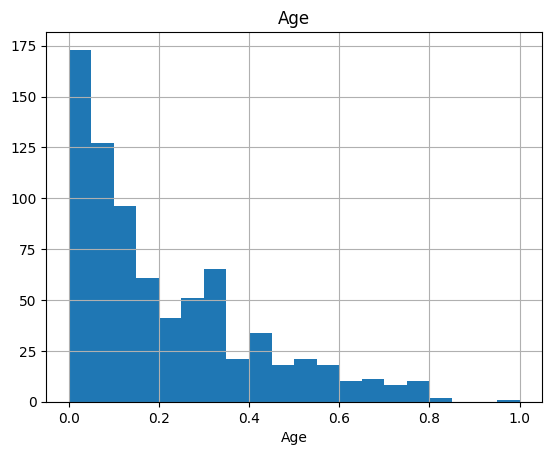

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

# **8. Analysis of Categorical Variables by Target**

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

         TARGET_MEAN
Outcome             
0              0.000
1              1.000




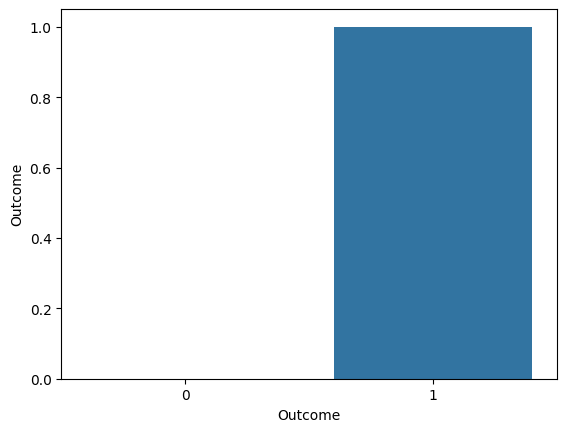

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col, plot=True)

# **9. Analisis Variabel Numerik Berdasarkan Target**

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

         Pregnancies_mean
Outcome                  
0                   0.194
1                   0.286




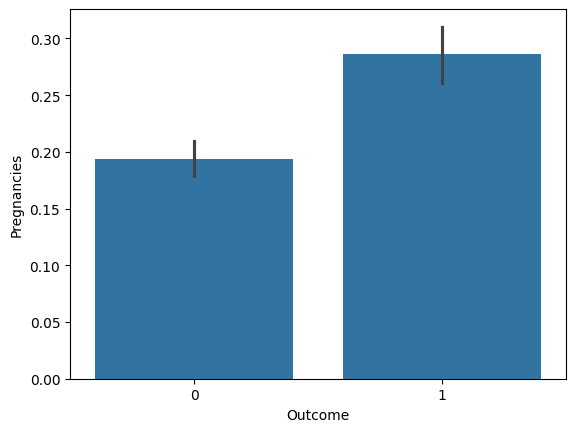

         Glucose_mean
Outcome              
0               0.430
1               0.633




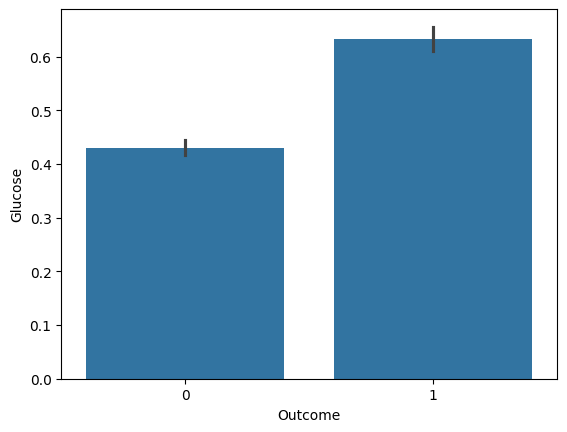

         BloodPressure_mean
Outcome                    
0                     0.479
1                     0.522




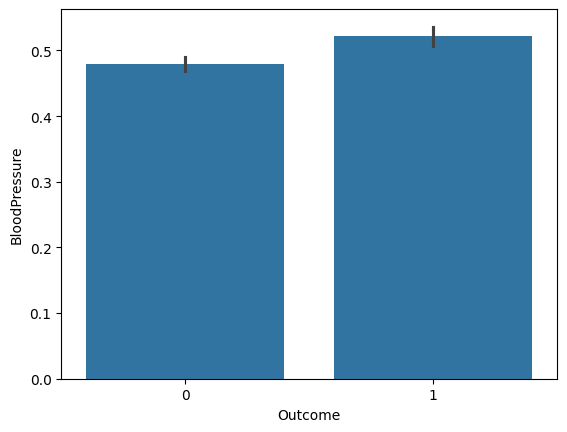

         SkinThickness_mean
Outcome                    
0                     0.225
1                     0.268




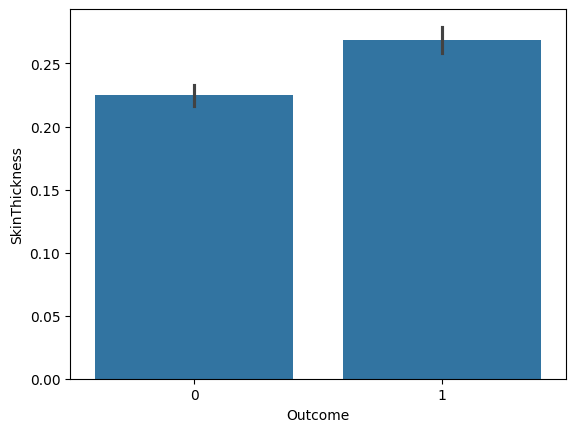

         Insulin_mean
Outcome              
0               0.137
1               0.181




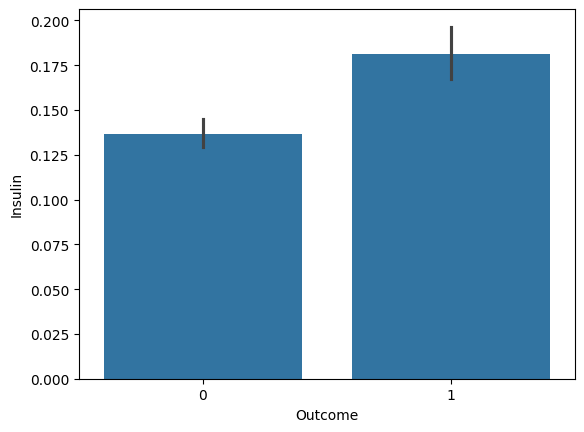

         BMI_mean
Outcome          
0           0.259
1           0.351




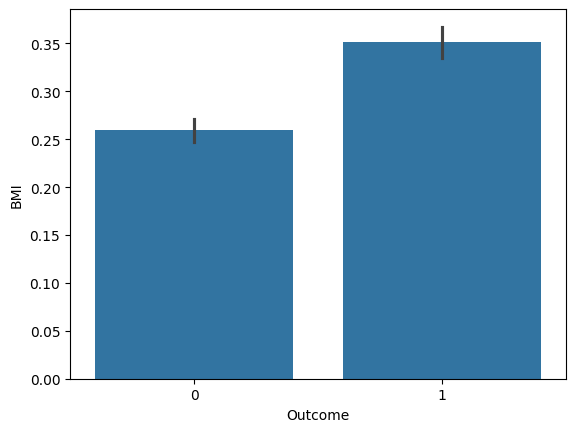

         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.150
1                                0.202




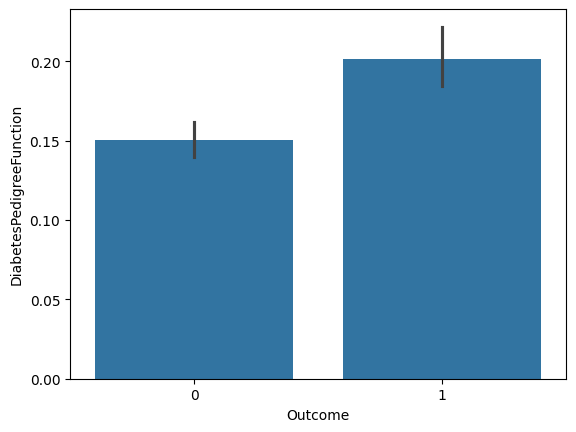

         Age_mean
Outcome          
0           0.170
1           0.268




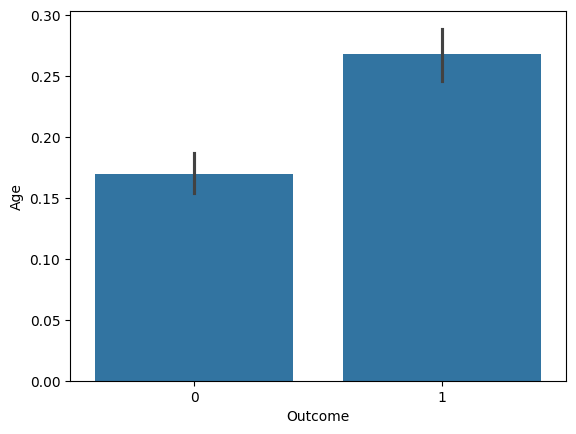

In [ ]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

# **10. Meneliti Logaritma Variabel Dependen**

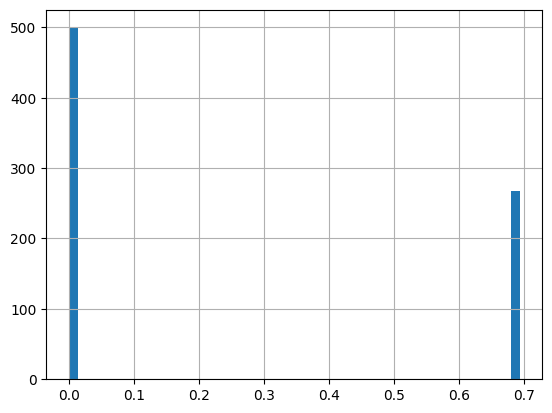

In [ ]:
np.log1p(df["Outcome"]).hist(bins=50)
plt.show(block=True)

# **11. Analisis Korelasi**

In [ ]:
corr = df[num_cols].corr()

In [ ]:
corr

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                     1.000    0.128          0.209          0.082    0.025 0.022   
Glucose                         0.128    1.000          0.219          0.193    0.419 0.231   
BloodPressure                   0.209    0.219          1.000          0.192    0.045 0.281   
SkinThickness                   0.082    0.193          0.192          1.000    0.156 0.543   
Insulin                         0.025    0.419          0.045          0.156    1.000 0.180   
BMI                             0.022    0.231          0.281          0.543    0.180 1.000   
DiabetesPedigreeFunction       -0.034    0.137         -0.002          0.102    0.127 0.153   
Age                             0.544    0.267          0.325          0.126    0.097 0.026   

                          DiabetesPedigreeFunction   Age  
Pregnancies                                 -0.034 0.544  
Glucose                                      0.137 0.267  
BloodPressure                               -0.002 0.325  
SkinThickness                                0.102 0.126  
Insulin                                      0.127 0.097  
BMI                                          0.153 0.026  
DiabetesPedigreeFunction                     1.000 0.034  
Age                                          0.034 1.000

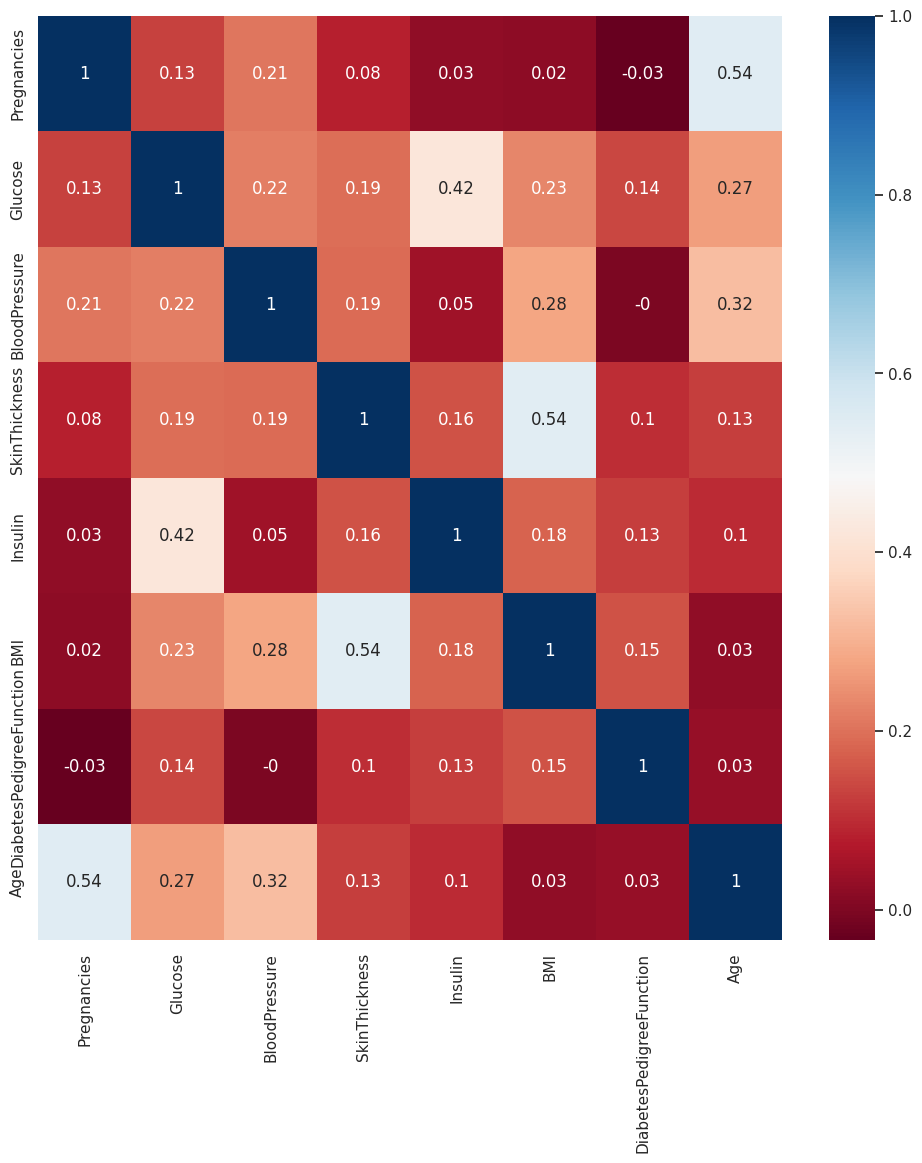

In [ ]:
# Correlation heatmap without using functions

sns.set(rc={"figure.figsize": (12, 12)})
corr_values = corr.round(2)
sns.heatmap(corr, cmap="RdBu", annot=corr_values)
plt.show(block=True)

In [ ]:
# Creation of correlation heat map using the function
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    # Replace np.bool with bool
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (12, 12)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

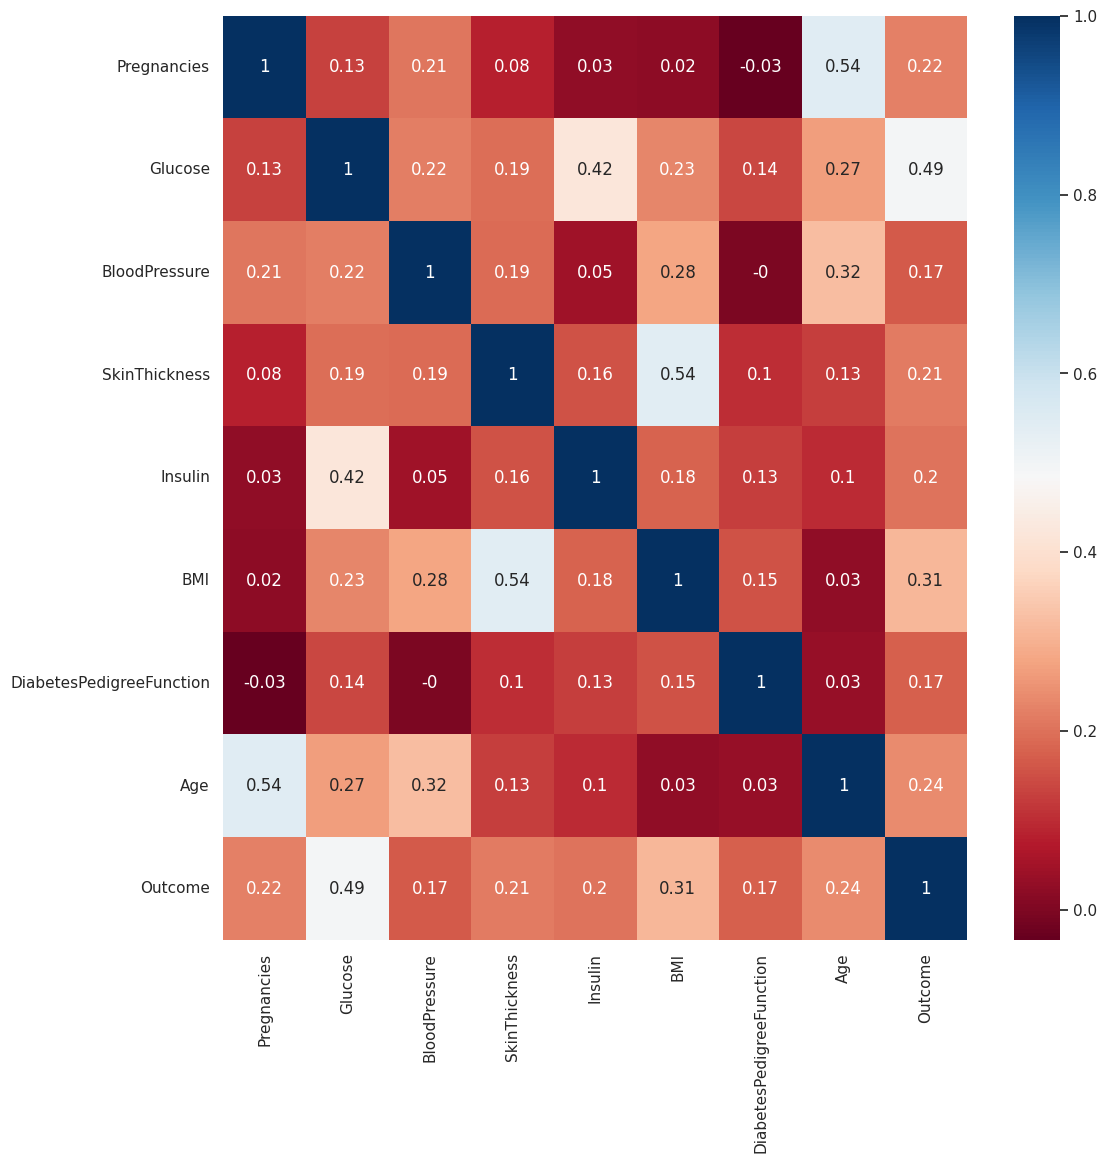

[]

In [ ]:
high_correlated_cols(df, plot=True)

# **12. Hubungan Antar Variabel**

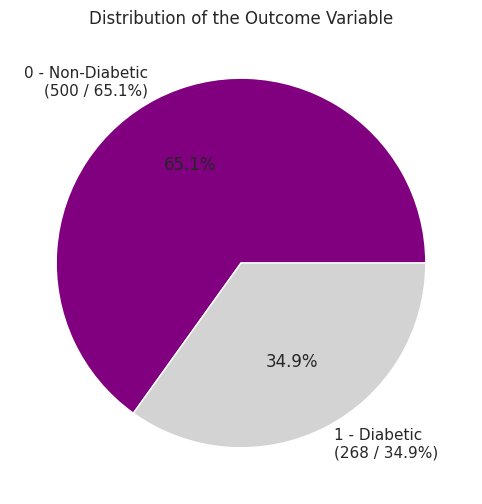

In [ ]:
# Calculate the counts of each outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Diabetic\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', 'lightgray'])
plt.title('Distribution of the Outcome Variable')
plt.show()


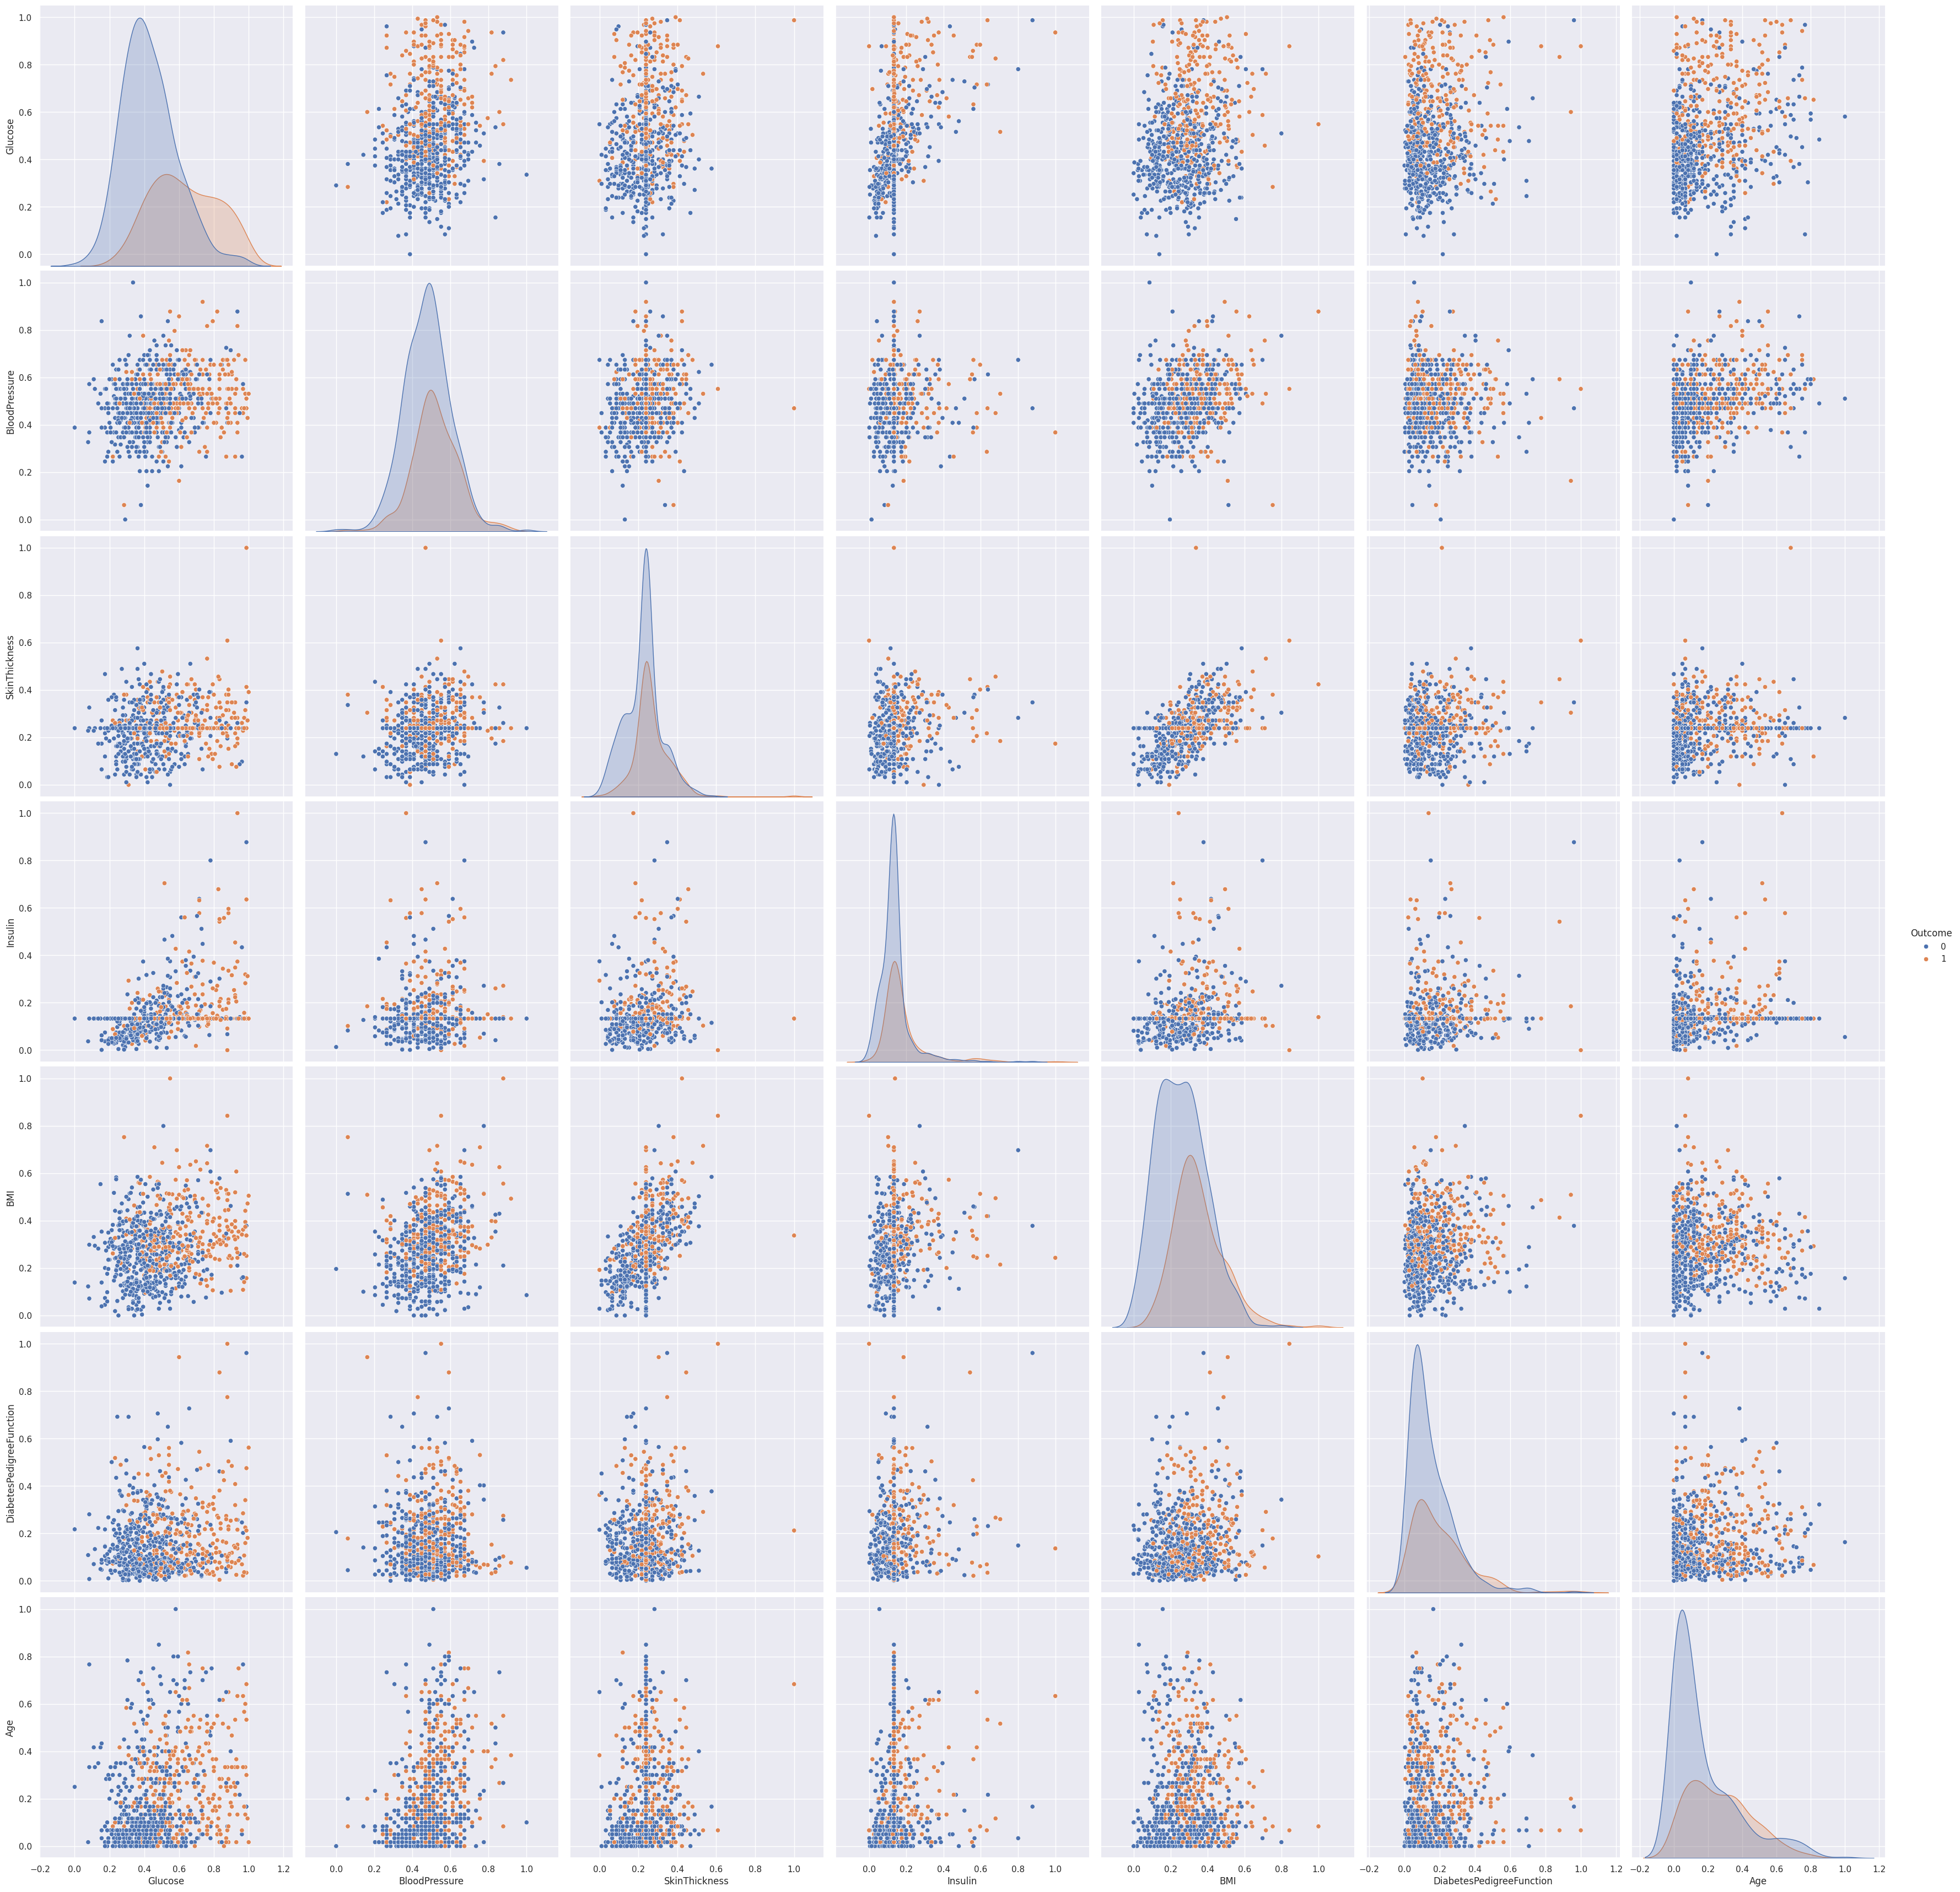

In [ ]:
sns.pairplot(data=df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

In [ ]:
# Create combinations of binary categorical variables
feature_combinations = list(itertools.combinations(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 2))

# Create a separate Bubble Chart for each binary categorical variable
for i, (feature1, feature2) in enumerate(feature_combinations):
    fig = px.scatter(df, x=feature1, y=feature2, color='Outcome', size='BMI',
                     title=f'{feature1} vs {feature2} Bubble Chart')

    fig.show(block=True)

# **13. Model Dasar Sebelum Rekayasa Fitur**

In [ ]:
# Creating the Dependent Variable.

y = df["Outcome"]

# Creating Independent Variables.

X = df.drop("Outcome", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

**13.1 RandomForestClassifier**

In [ ]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7706
Recall: 0.6892
Precision: 0.6296
F1: 0.6581
Auc: 0.7491


**13.2 Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")


Logistic Regression:
Accuracy: 0.7706
Recall: 0.7333
Precision: 0.5432
F1: 0.6241
AUC: 0.7585


**13.3 K-Nearest Neighbors (KNN)**

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.7749
Recall: 0.6986
Precision: 0.6296
F1: 0.6623
AUC: 0.7544


**13.4 Support Vector Classifier (SVC)**

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")


Support Vector Classifier (SVC):
Accuracy: 0.7576
Recall: 0.6984
Precision: 0.5432
F1: 0.6111
AUC: 0.7391


**13.5 Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")


Decision Tree Classifier:
Accuracy: 0.7229
Recall: 0.6049
Precision: 0.6049
F1: 0.6049
AUC: 0.6958


**13.6 AdaBoost Classifier**

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")


AdaBoost Classifier:
Accuracy: 0.7619
Recall: 0.7031
Precision: 0.5556
F1: 0.6207
AUC: 0.7438


**13.7 Gradient Boosting Classifier**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")


Gradient Boosting Classifier:
Accuracy: 0.7835
Recall: 0.6914
Precision: 0.6914
F1: 0.6914
AUC: 0.7623


**13.8 XGBoost Classifier**

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")


XGBoost Classifier:
Accuracy: 0.7706
Recall: 0.6944
Precision: 0.6173
F1: 0.6536
AUC: 0.7497


**13.9 LightGBM Classifier**

In [ ]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")


[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**13.10 Comparison of Metrics for Different Models**

In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7706, 0.7879, 0.7619, 0.7446, 0.7186, 0.7532, 0.7706, 0.7706, 0.7619],
    "Recall": [0.7059, 0.7667, 0.6711, 0.6833, 0.6053, 0.6765, 0.7, 0.7059, 0.6857],
    "Precision": [0.5926, 0.5679, 0.6296, 0.5062, 0.5679, 0.5679, 0.6049, 0.5926, 0.5926],
    "F1": [0.6443, 0.6525, 0.6497, 0.5816, 0.586, 0.6174, 0.649, 0.6443, 0.6358],
    "AUC": [0.7517, 0.781, 0.7388, 0.7247, 0.6897, 0.7309, 0.7506, 0.7517, 0.7404]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models"
)

# Displaying the graph
fig.show(block=True)


**Kesimpulan**

- Akurasi: Akurasi mewakili tingkat kebenaran prediksi model secara keseluruhan. Ini menunjukkan proporsi kasus yang diklasifikasikan dengan benar dari total data.

- Recall: Recall mengukur proporsi kasus diabetes aktual yang diidentifikasi dengan benar oleh model. Hal ini menunjukkan seberapa baik model tersebut menangkap kasus positif diabetes yang sebenarnya.

- Presisi: Presisi menghitung proporsi prediksi kasus diabetes yang sebenarnya merupakan kasus positif. Hal ini menunjukkan keakuratan prediksi positif model untuk diabetes.

- Skor F1: Skor F1 adalah rata-rata harmonis dari perolehan dan presisi. Ini memberikan ukuran yang seimbang dengan mempertimbangkan perolehan dan presisi secara setara, dan mengevaluasi performa model secara keseluruhan.

- AUC (Area di Bawah Kurva): AUC mewakili area di bawah kurva Karakteristik Operasi Penerima (ROC). Ini mencerminkan kemampuan model untuk membedakan kelas-kelas dan memberikan ukuran kinerja secara keseluruhan.

**13.11 Visualization of the Decision Tree**

|--- feature_1 <= 0.55
|   |--- feature_5 <= 0.17
|   |   |--- feature_4 <= 0.04
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.04
|   |   |   |--- class: 0
|   |--- feature_5 >  0.17
|   |   |--- feature_7 <= 0.11
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.11
|   |   |   |--- class: 0
|--- feature_1 >  0.55
|   |--- feature_5 <= 0.20
|   |   |--- feature_1 <= 0.65
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.65
|   |   |   |--- class: 0
|   |--- feature_5 >  0.20
|   |   |--- feature_1 <= 0.74
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.74
|   |   |   |--- class: 1



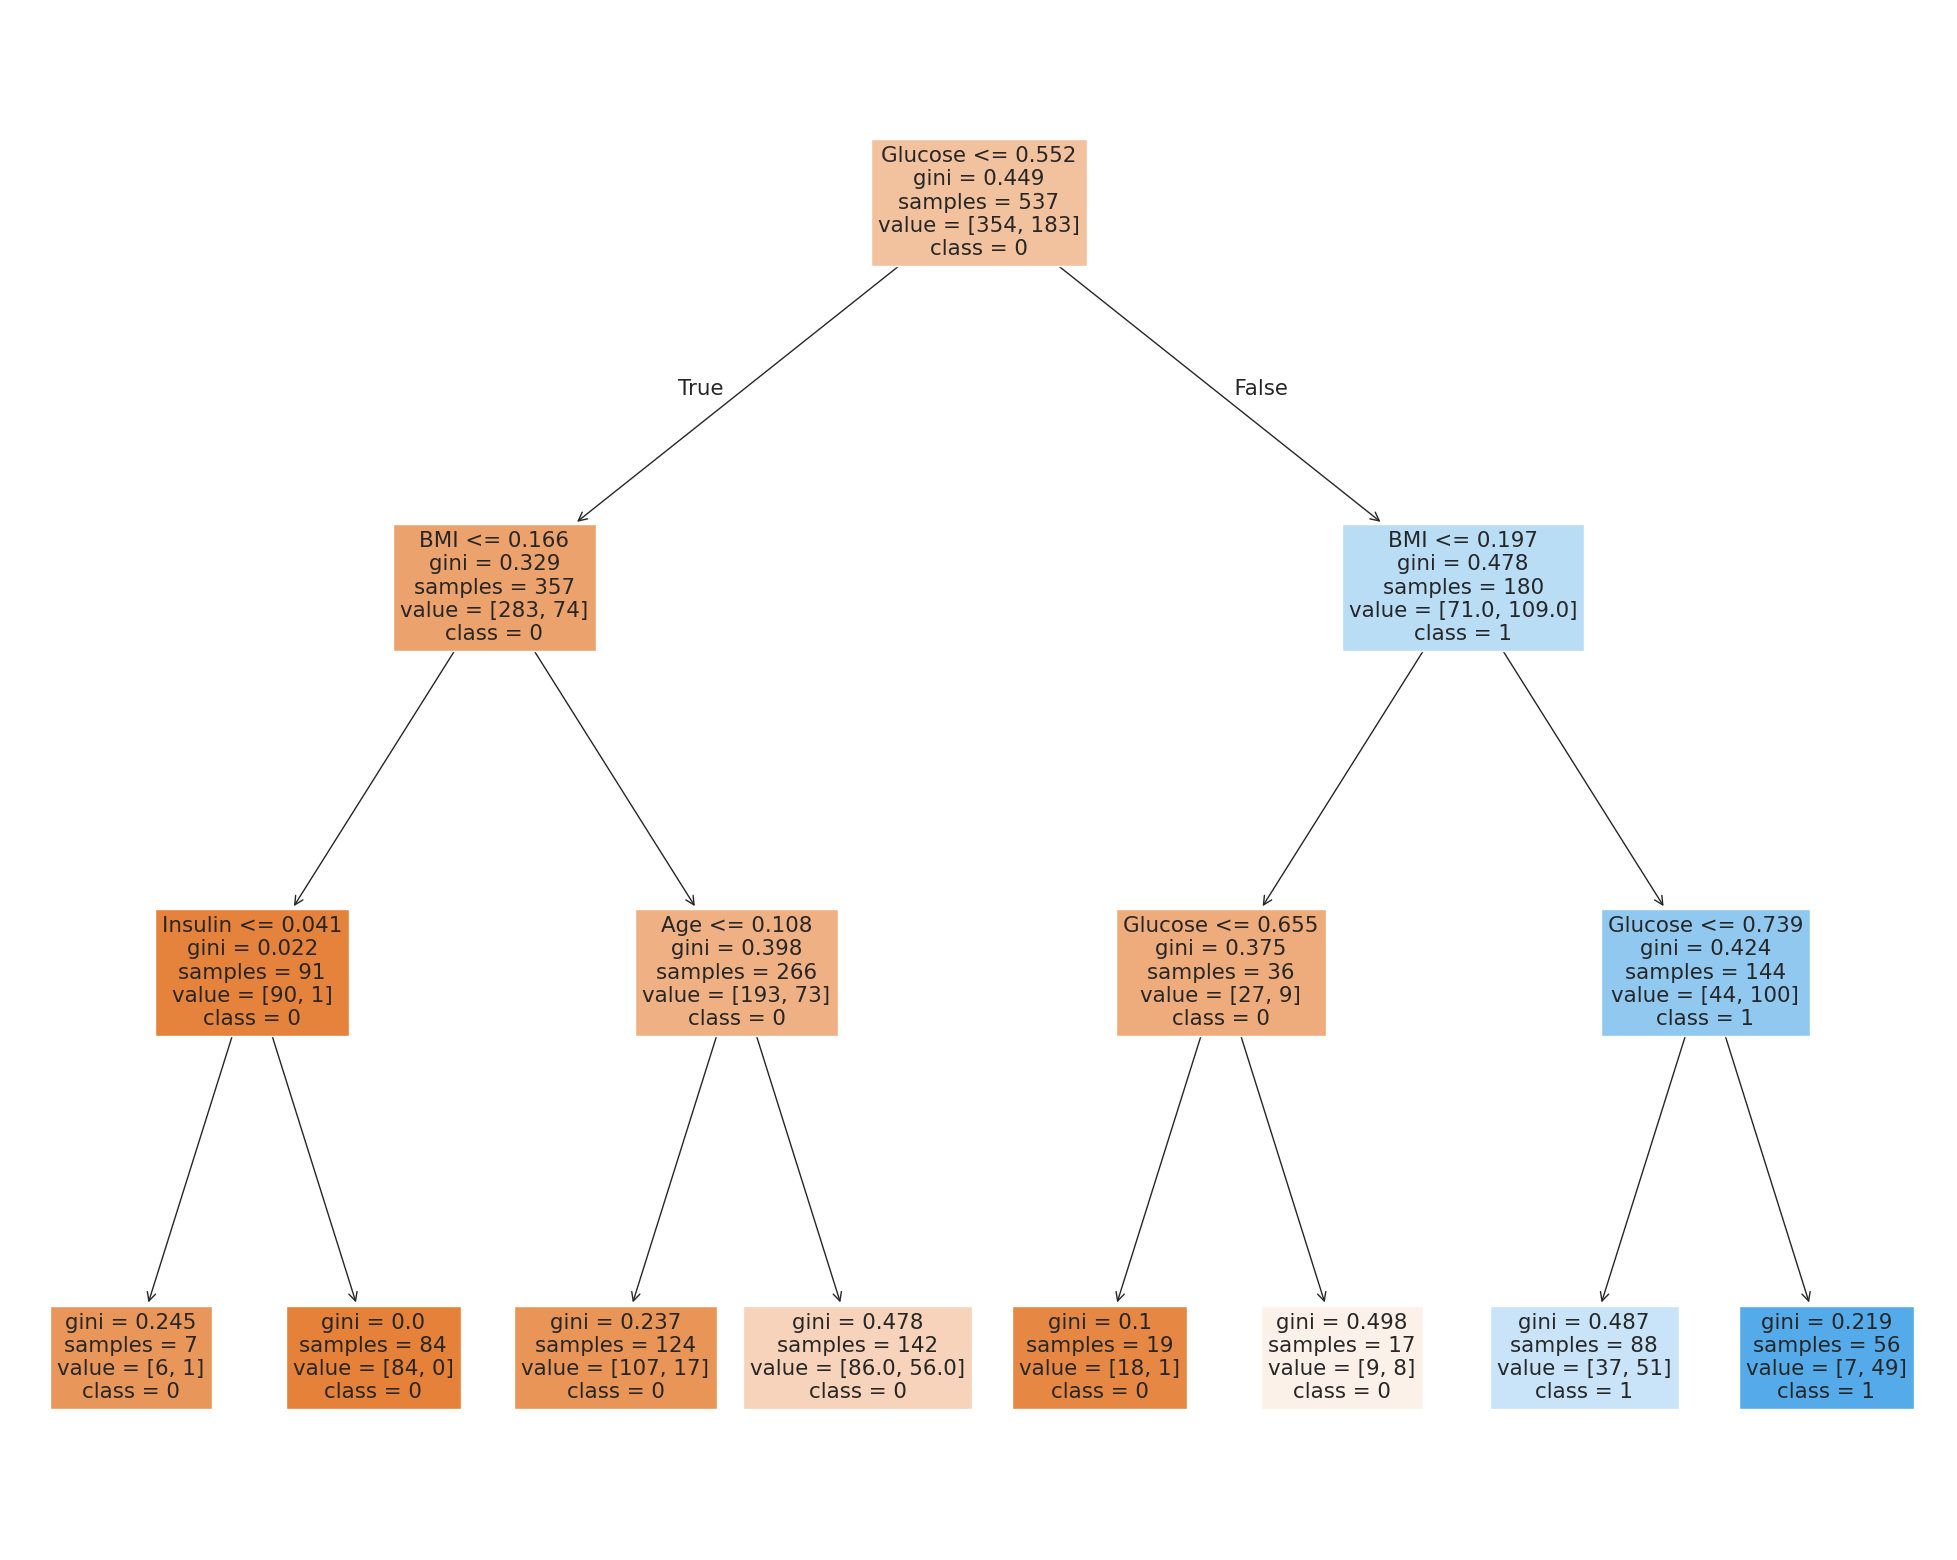

In [ ]:
# Loading the dataset and setting the features and target variable
x = pd.DataFrame(df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df.Outcome.values.reshape(-1, 1)

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Defining and training the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(x_test)

# Generating the text representation of the decision tree and printing it
text_representation = tree.export_text(clf)
print(text_representation)

# Setting the feature and target class names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']

# Generating and saving the visualization of the decision tree
fig = plt.figure(figsize=(25, 20))
plot = tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
fig.savefig('tree1.png')

**13.12 Plot Importance of Variables According to Base Model**

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')


In [ ]:
model_name = [rf_model, dt_model, xgb_model, lgbm_model]

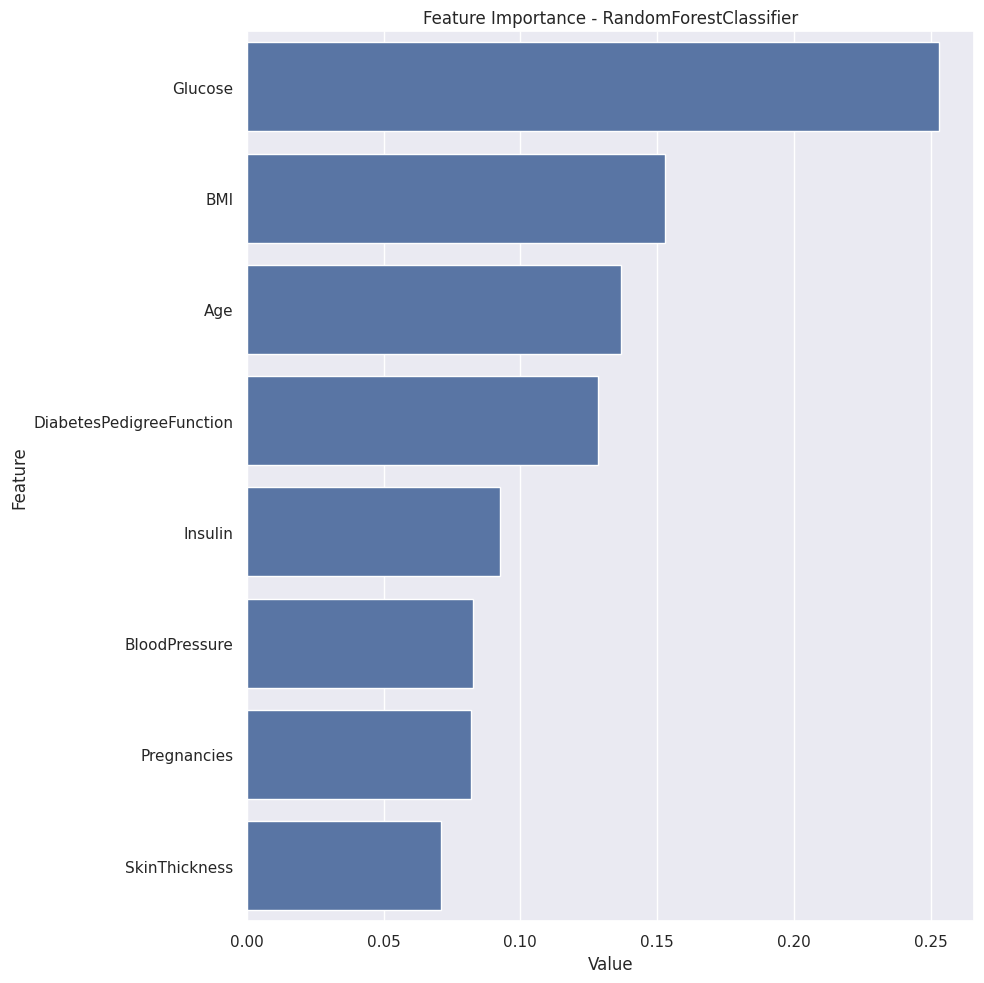

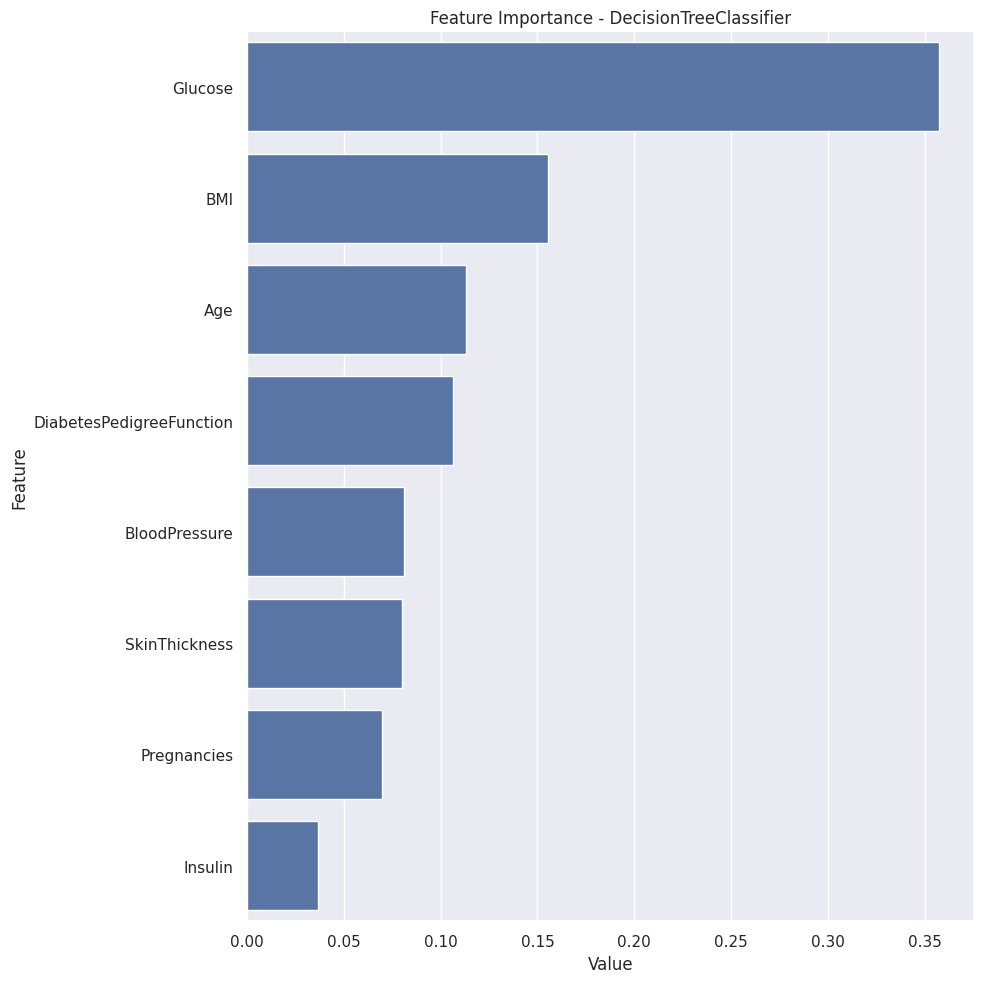

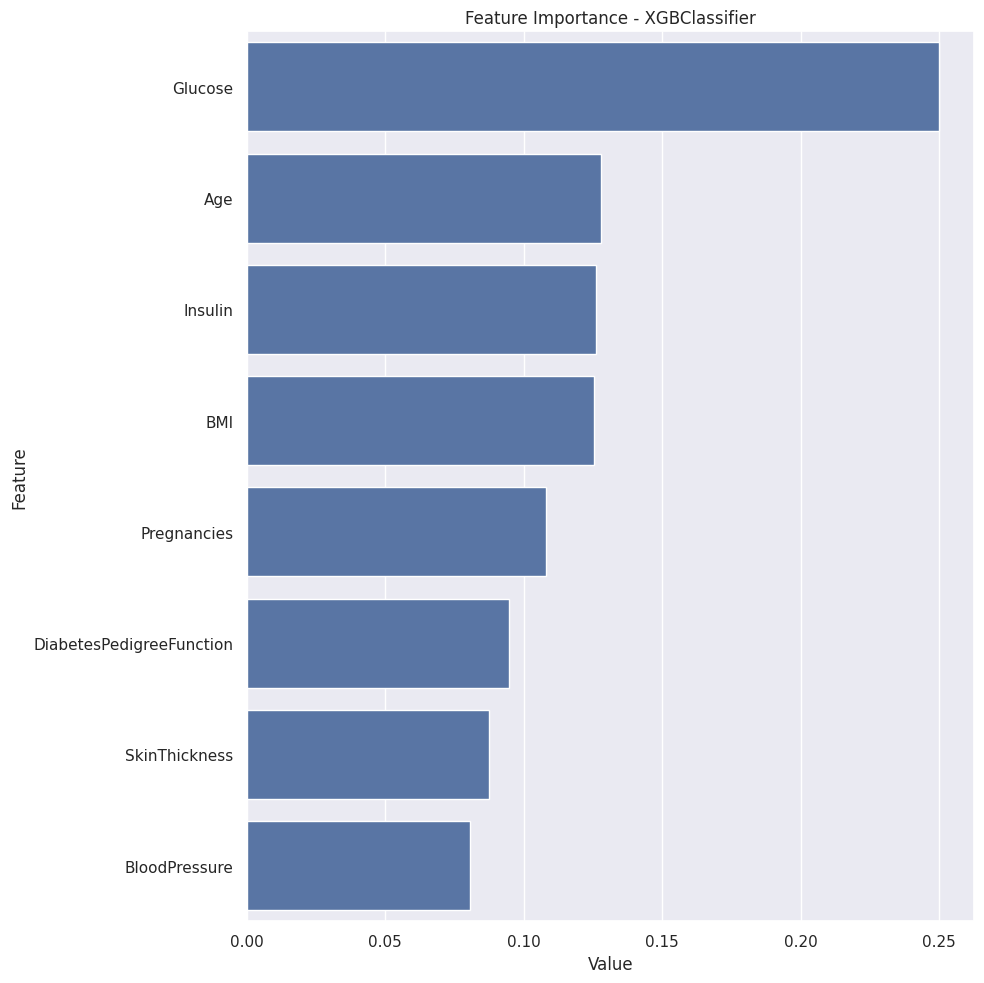

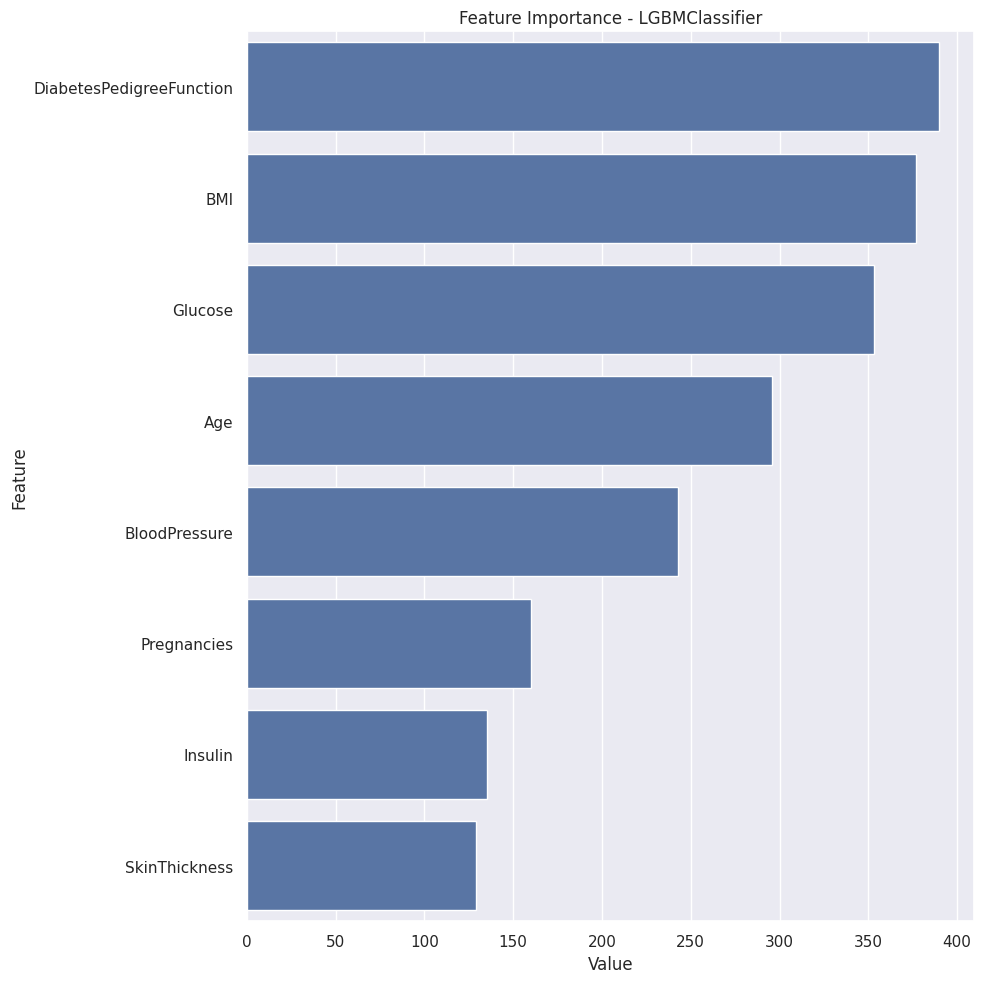

In [ ]:
for i in model_name:
    plot_importance(i, X)

# **14. Feature Engineering**

**Di bagian ini, kami akan melakukan operasi rekayasa variabel berikut :**

- Deteksi Nilai Hilang
- Deteksi Pencilan (Outlier)
- Ekstraksi Fitur

# **15. Missing Value Analysis**

In [ ]:
# Detection of variables with missing observations filled with zero in the data set.

zero_colunms = [col for col in df.columns if (df[col].min() == 0 and col not in  ["Pregnancies", "Outcome"])]

In [ ]:
zero_colunms

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Filling the missing observations in the dataset with NaN that are filled with zero.

for col in zero_colunms:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      1
BloodPressure                1
SkinThickness                2
Insulin                      1
BMI                          3
DiabetesPedigreeFunction     1
Age                         63
Outcome                      0
dtype: int64

In [ ]:
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if plot:
        # Plotting the missing values
        plt.figure(figsize=(10, 8))
        bars = plt.bar(missing_df.index, missing_df['ratio'], color='purple')
        plt.xlabel('Features')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Missing Values by Feature')

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    if na_name:
        return na_columns


                          n_miss  ratio
Age                           63  8.200
BMI                            3  0.390
SkinThickness                  2  0.260
Glucose                        1  0.130
BloodPressure                  1  0.130
Insulin                        1  0.130
DiabetesPedigreeFunction       1  0.130


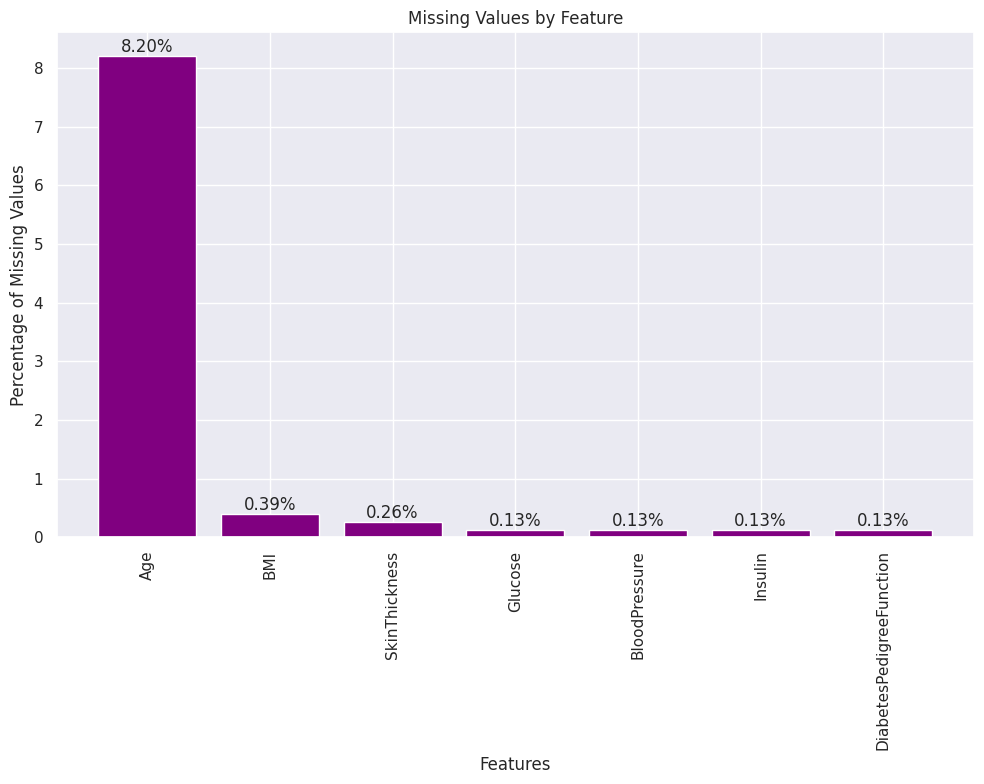

In [ ]:
na_columns = missing_values_table(df, na_name=True, plot=True)

In [ ]:
def missing_vs_target(dataframe, target, na_columns, plot=False):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
        if plot:
            # Plotting the target mean by NA flag
            plt.figure(figsize=(6, 4))
            temp_df.groupby(col)[target].mean().plot(kind='bar', color='purple')
            plt.xlabel(col)
            plt.ylabel('Target Mean')
            plt.title(f'Target Mean by {col}')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
            print("= "* 50)



                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    767
1                      0.000      1




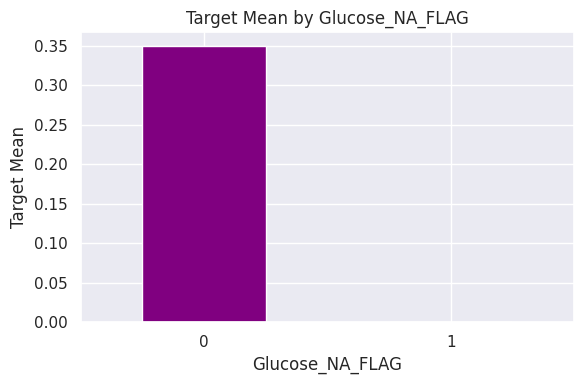

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.349    767
1                            0.000      1




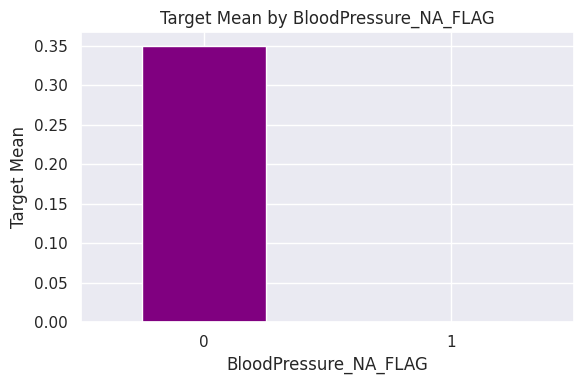

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.349    766
1                            0.500      2




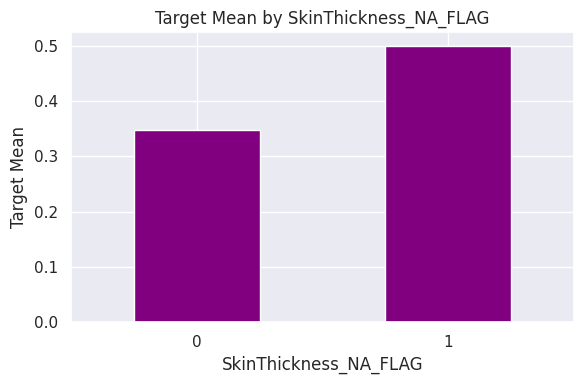

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.348    767
1                      1.000      1




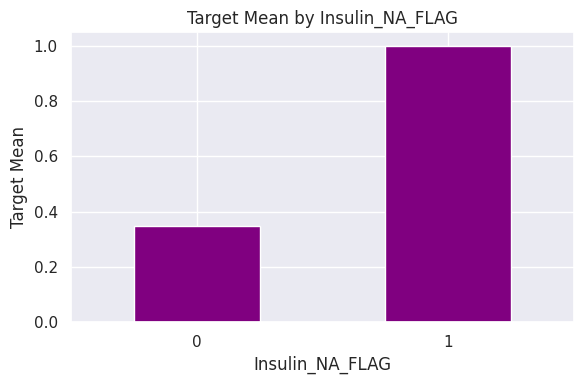

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.350    765
1                  0.000      3




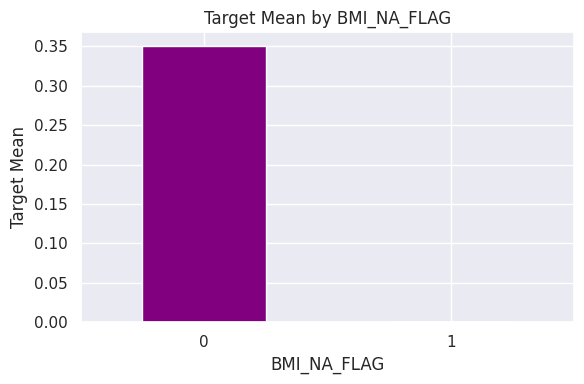

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                                  TARGET_MEAN  Count
DiabetesPedigreeFunction_NA_FLAG                    
0                                       0.349    767
1                                       0.000      1




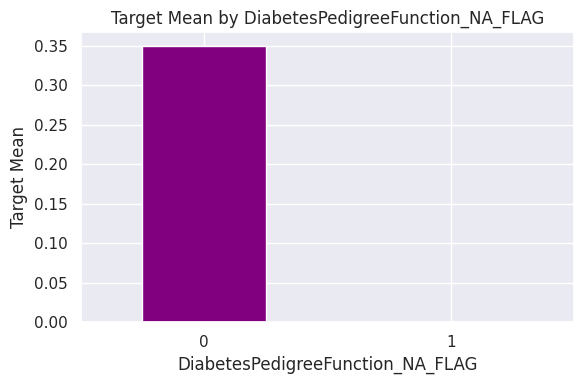

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.373    705
1                  0.079     63




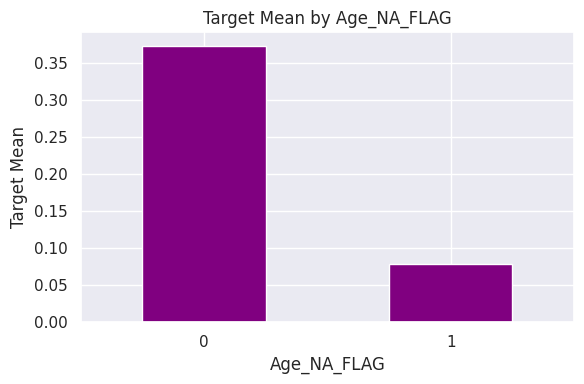

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [ ]:
missing_vs_target(df, "Outcome", na_columns, plot=True)

In [ ]:
"""
# Option 1
# Filling the missing observations filled with NaN in the data set with the median value of that column.

for col in zero_colunms:
    df.loc[df[col].isnull(), col] = df[col].median()

df.isnull().sum()

df.head(10)
"""

'\n# Option 1\n# Filling the missing observations filled with NaN in the data set with the median value of that column.\n\nfor col in zero_colunms:\n    df.loc[df[col].isnull(), col] = df[col].median()\n\ndf.isnull().sum()\n\ndf.head(10)\n'

In [ ]:
# Option 2
# Filled KNN Imputers

dff = df[na_columns]

In [ ]:
rs = RobustScaler()

In [ ]:
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

In [ ]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction   Age
0    0.765          0.000          0.857    0.000  0.144                     0.661 1.250
1   -0.790         -0.375          0.000    0.000 -0.633                    -0.060 0.062
2    1.630         -0.500          0.000    0.000 -1.000                     0.779 0.125
3   -0.691         -0.375         -0.857   -5.636 -0.467                    -0.541   NaN
4    0.494         -2.000          0.857    7.818  1.200                     5.004 0.188

In [ ]:
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)

In [ ]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age
0    0.765          0.000          0.857    0.000  0.144                     0.661  1.250
1   -0.790         -0.375          0.000    0.000 -0.633                    -0.060  0.062
2    1.630         -0.500          0.000    0.000 -1.000                     0.779  0.125
3   -0.691         -0.375         -0.857   -5.636 -0.467                    -0.541 -0.325
4    0.494         -2.000          0.857    7.818  1.200                     5.004  0.188

In [ ]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

In [ ]:
df[na_columns] = dff

In [ ]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   
5        0.294    0.465          0.510          0.239    0.133 0.151                     0.053   
6        0.176    0.219          0.265          0.272    0.089 0.262                     0.073   
7        0.588    0.458          0.490          0.239    0.133 0.350                     0.024   
8        0.118    0.987          0.469          0.413    0.636 0.252                     0.034   
9        0.471    0.523          0.735          0.239    0.133 0.288                     0.066   

    Age  Outcome  
0 0.483        1  
1 0.167        0  
2 0.183        1  
3 0.063        0  
4 0.200        1  
5 0.150        0  
6 0.083        1  
7 0.133        0  
8 0.533        1  
9 0.550        1

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **16. Outlier Analysis**

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False


In [ ]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Pregnancies False
Glucose False
BloodPressure False


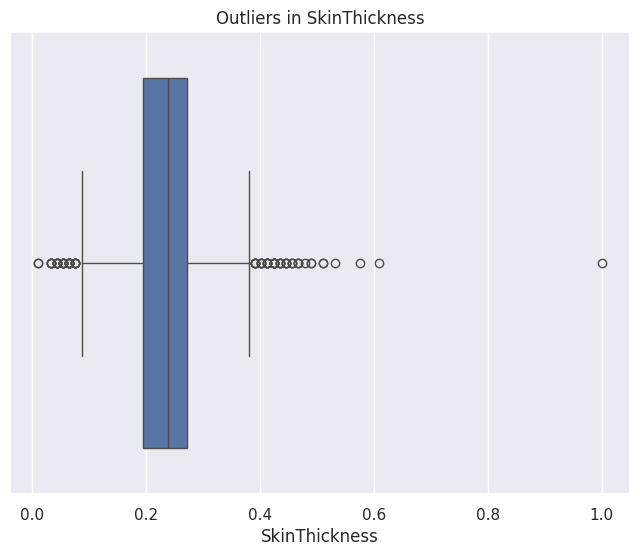

SkinThickness True


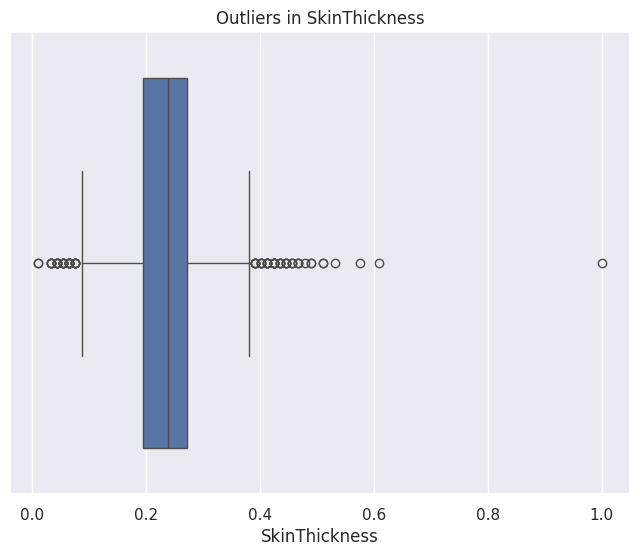

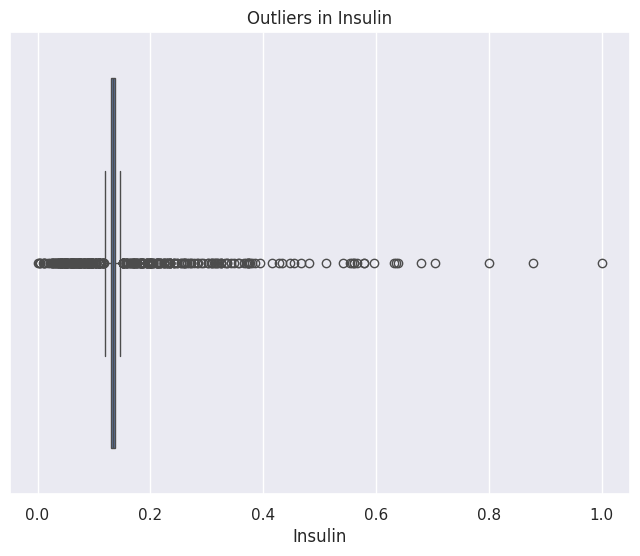

Insulin True


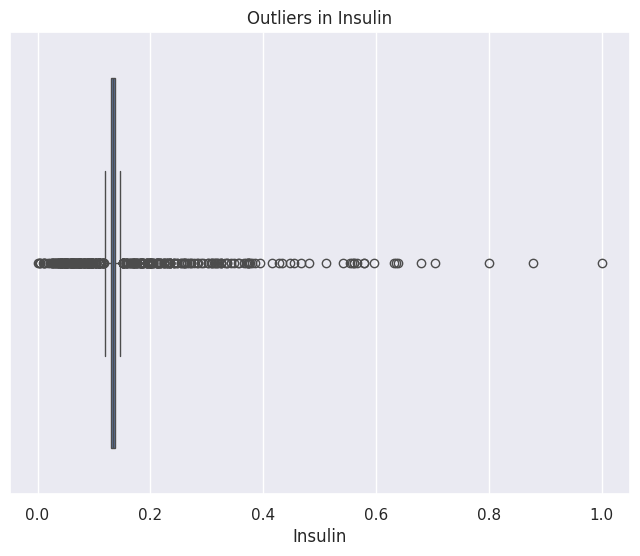

BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [ ]:
for col in df.columns:
    print(col, check_outlier(df, col, plot=True))
    if check_outlier(df, col, plot=True):
        replace_with_thresholds(df, col)

In [ ]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


# **17. Feature Extraction**

In [ ]:
# Creating a new age variable by categorizing the age variable

df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

In [ ]:
# BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight and above 30 is obese

df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [ ]:
# Converting Glucose Value to Categorical Variable

df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [ ]:
# Creating a categorical variable by considering age and body mass index together 3 breakdowns were captured

df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [ ]:
# Creating a categorical variable by considering age and glucose values together

df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [ ]:
# Deriving a Categorical variable with Insulin Value.

def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)
df["NEW_GLUCOSE * INSULIN"] =df["Glucose"] * df["Insulin"]


In [ ]:
# Attention to values with zero !!!

df["NEW_GLUCOSE * PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [ ]:
# Translating Column Names to Uppercase Letters.

df.columns = [col.upper() for col in df.columns]

In [ ]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  DIABETESPEDIGREEFUNCTION  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   

    AGE  OUTCOME NEW_AGE_CAT      NEW_BMI NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM  \
0 0.483        1         NaN  Underweight      Normal             NaN                 NaN   
1 0.167        0         NaN  Underweight      Normal             NaN                 NaN   
2 0.183        1         NaN  Underweight      Normal             NaN                 NaN   
3 0.063        0         NaN  Underweight      Normal             NaN                 NaN   
4 0.200        1         NaN  Underweight      Normal             NaN                 NaN   

  NEW_INSULIN_SCORE  NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  
0          Abnormal                  0.090                      0.237  
1          Abnormal                  0.035                      0.016  
2          Abnormal                  0.120                      0.422  
3          Abnormal                  0.028                      0.017  
4          Abnormal                  0.111                      0.000

In [ ]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [ ]:
cat_cols

['NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'OUTCOME',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [ ]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE * INSULIN',
 'NEW_GLUCOSE * PREGNANCIES']

In [ ]:
cat_but_car

[]

In [ ]:
num_but_cat

['OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']

# **18. Encoding**

In [ ]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [ ]:
binary_cols

[]

In [ ]:
for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  DIABETESPEDIGREEFUNCTION  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   
5        0.294    0.465          0.510          0.239    0.133 0.151                     0.053   
6        0.176    0.219          0.265          0.272    0.089 0.262                     0.073   
7        0.588    0.458          0.490          0.239    0.133 0.350                     0.024   
8        0.118    0.987          0.469          0.413    0.636 0.252                     0.034   
9        0.471    0.523          0.735          0.239    0.133 0.288                     0.066   

    AGE  OUTCOME NEW_AGE_CAT      NEW_BMI NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM  \
0 0.483        1         NaN  Underweight      Normal             NaN                 NaN   
1 0.167        0         NaN  Underweight      Normal             NaN                 NaN   
2 0.183        1         NaN  Underweight      Normal             NaN                 NaN   
3 0.063        0         NaN  Underweight      Normal             NaN                 NaN   
4 0.200        1         NaN  Underweight      Normal             NaN                 NaN   
5 0.150        0         NaN  Underweight      Normal             NaN                 NaN   
6 0.083        1         NaN  Underweight      Normal             NaN                 NaN   
7 0.133        0         NaN  Underweight      Normal             NaN                 NaN   
8 0.533        1         NaN  Underweight      Normal             NaN                 NaN   
9 0.550        1         NaN  Underweight      Normal             NaN                 NaN   

  NEW_INSULIN_SCORE  NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  
0          Abnormal                  0.090                      0.237  
1          Abnormal                  0.035                      0.016  
2          Abnormal                  0.120                      0.422  
3          Abnormal                  0.028                      0.017  
4          Abnormal                  0.111                      0.000  
5          Abnormal                  0.062                      0.137  
6          Abnormal                  0.020                      0.039  
7          Abnormal                  0.061                      0.269  
8          Abnormal                  0.628                      0.116  
9          Abnormal                  0.070                      0.246

In [ ]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

In [ ]:
cat_cols

['NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [ ]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  DIABETESPEDIGREEFUNCTION  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   
5        0.294    0.465          0.510          0.239    0.133 0.151                     0.053   
6        0.176    0.219          0.265          0.272    0.089 0.262                     0.073   
7        0.588    0.458          0.490          0.239    0.133 0.350                     0.024   
8        0.118    0.987          0.469          0.413    0.636 0.252                     0.034   
9        0.471    0.523          0.735          0.239    0.133 0.288                     0.066   

    AGE  OUTCOME  NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  NEW_BMI_Healthy  \
0 0.483        1                  0.090                      0.237            False   
1 0.167        0                  0.035                      0.016            False   
2 0.183        1                  0.120                      0.422            False   
3 0.063        0                  0.028                      0.017            False   
4 0.200        1                  0.111                      0.000            False   
5 0.150        0                  0.062                      0.137            False   
6 0.083        1                  0.020                      0.039            False   
7 0.133        0                  0.061                      0.269            False   
8 0.533        1                  0.628                      0.116            False   
9 0.550        1                  0.070                      0.246            False   

   NEW_BMI_Overweight  NEW_BMI_Obese  NEW_GLUCOSE_Prediabetes  NEW_GLUCOSE_Diabetes  
0               False          False                    False                 False  
1               False          False                    False                 False  
2               False          False                    False                 False  
3               False          False                    False                 False  
4               False          False                    False                 False  
5               False          False                    False                 False  
6               False          False                    False                 False  
7               False          False                    False                 False  
8               False          False                    False                 False  
9               False          False                    False                 False

# **19. Standardization Process**

In [ ]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE * INSULIN',
 'NEW_GLUCOSE * PREGNANCIES']

In [ ]:
scaler = RobustScaler()

In [ ]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  \
0        0.600    0.770          0.000          0.857    0.000  0.144                     0.666   
1       -0.400   -0.795         -0.375          0.000    0.000 -0.632                    -0.056   
2        1.000    1.640         -0.500          0.000    0.000 -0.997                     0.784   
3       -0.400   -0.696         -0.375         -0.857   -4.960 -0.465                    -0.538   
4       -0.600    0.497         -2.000          0.857    6.880  1.197                     5.011   
5        0.400   -0.025          0.125          0.000    0.000 -0.742                    -0.449   
6        0.000   -0.969         -1.375          0.429   -5.920 -0.144                    -0.326   
7        1.400   -0.050          0.000          0.000    0.000  0.332                    -0.624   
8       -0.200    1.988         -0.125          2.286   66.880 -0.199                    -0.561   
9        1.000    0.199          1.500          0.000    0.000  0.000                    -0.368   

     AGE  OUTCOME  NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  NEW_BMI_Healthy  \
0  1.231        1                  0.492                      1.124            False   
1  0.044        0                 -0.508                     -0.425            False   
2  0.106        1                  1.047                      2.420            False   
3 -0.344        0                 -0.644                     -0.414            False   
4  0.169        1                  0.889                     -0.534            False   
5 -0.019        0                 -0.016                      0.422            False   
6 -0.269        1                 -0.799                     -0.263            False   
7 -0.081        0                 -0.032                      1.352            False   
8  1.419        1                 10.412                      0.279            False   
9  1.481        1                  0.127                      1.187            False   

   NEW_BMI_Overweight  NEW_BMI_Obese  NEW_GLUCOSE_Prediabetes  NEW_GLUCOSE_Diabetes  
0               False          False                    False                 False  
1               False          False                    False                 False  
2               False          False                    False                 False  
3               False          False                    False                 False  
4               False          False                    False                 False  
5               False          False                    False                 False  
6               False          False                    False                 False  
7               False          False                    False                 False  
8               False          False                    False                 False  
9               False          False                    False                 False

In [ ]:
df.shape

(768, 16)

# **20. Model Building**

In [ ]:
# Creating the Dependent Variable.

y = df["OUTCOME"]

# Creating Independent Variables.

X = df.drop("OUTCOME", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# 20.1.RandomForestClassifier

In [ ]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7835
Recall: 0.7067
Precision: 0.6543
F1: 0.6795
Auc: 0.7636


In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - RandomForestClassifier')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

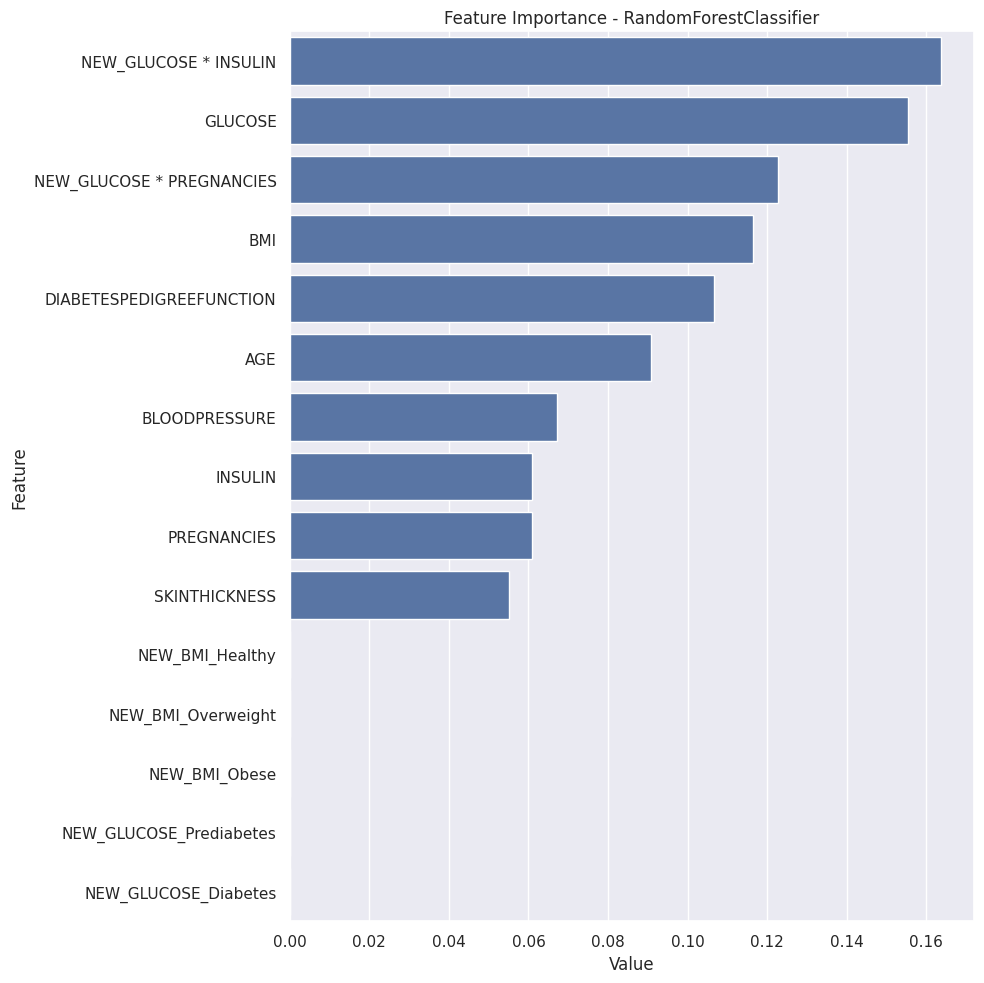

In [ ]:
plot_importance(rf_model, X)

20.1.1.Random Forest Classifier Hyperparameter Optimization

In [ ]:
rf_model = RandomForestClassifier(random_state=46)
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, parameters, cv=5).fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_

y_pred = best_rf_model.predict(X_test)
print("Random Forest Classifier - Hyperparameter Optimization")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1: {round(f1_score(y_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(y_pred, y_test), 4)}")

Random Forest Classifier - Hyperparameter Optimization
Accuracy: 0.7792
Recall: 0.6829
Precision: 0.6914
F1: 0.6871
AUC: 0.7576


# 20.2.Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")

Logistic Regression:
Accuracy: 0.7706
Recall: 0.7188
Precision: 0.5679
F1: 0.6345
AUC: 0.7546


# 20.2.1.Logistic Regression Hyperparameter Optimization

In [ ]:
lr_model = LogisticRegression(random_state=46)
parameters = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr_model, parameters, cv=5).fit(X_train, y_train)

best_lr_model = lr_grid.best_estimator_

print("Logistic Regression - Hyperparameter Optimization")
print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Accuracy: {round(lr_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_lr_model.predict(X_test), y_test), 4)}")

Logistic Regression - Hyperparameter Optimization
Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7636
Recall: 0.7188
Precision: 0.5679
F1: 0.6345
AUC: 0.7546


# 20.3.K-Nearest Neighbors (KNN)

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")

K-Nearest Neighbors (KNN):
Accuracy: 0.6926
Recall: 0.5806
Precision: 0.4444
F1: 0.5035
AUC: 0.6572


# 20.3.1.K-Nearest Neighbors (KNN) Hyperparameter Optimization

In [ ]:
knn_model = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, parameters, cv=5).fit(X_train, y_train)

best_knn_model = knn_grid.best_estimator_

print("K-Nearest Neighbors (KNN) - Hyperparameter Optimization")
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Accuracy: {round(knn_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_knn_model.predict(X_test), y_test), 4)}")

K-Nearest Neighbors (KNN) - Hyperparameter Optimization
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7244
Recall: 0.6056
Precision: 0.5309
F1: 0.5658
AUC: 0.6841


# 20.4.Support Vector Classifier (SVC)

In [ ]:
svc_model = SVC(random_state=46).fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")

Support Vector Classifier (SVC):
Accuracy: 0.7359
Recall: 0.7083
Precision: 0.4198
F1: 0.5271
AUC: 0.7258


# 20.4.1.Support Vector Classifier (SVC) Hyperparameter Optimization

In [ ]:
svc_model = SVC(random_state=46)
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_model, parameters, cv=5).fit(X_train, y_train)

best_svc_model = svc_grid.best_estimator_

print("Support Vector Classifier (SVC) - Hyperparameter Optimization")
print(f"Best Parameters: {svc_grid.best_params_}")
print(f"Accuracy: {round(svc_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_svc_model.predict(X_test), y_test), 4)}")

Support Vector Classifier (SVC) - Hyperparameter Optimization
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.7747
Recall: 0.7333
Precision: 0.5432
F1: 0.6241
AUC: 0.7585


# 20.5.Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=46).fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")

Decision Tree Classifier:
Accuracy: 0.7013
Recall: 0.5682
Precision: 0.6173
F1: 0.5917
AUC: 0.6757


In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

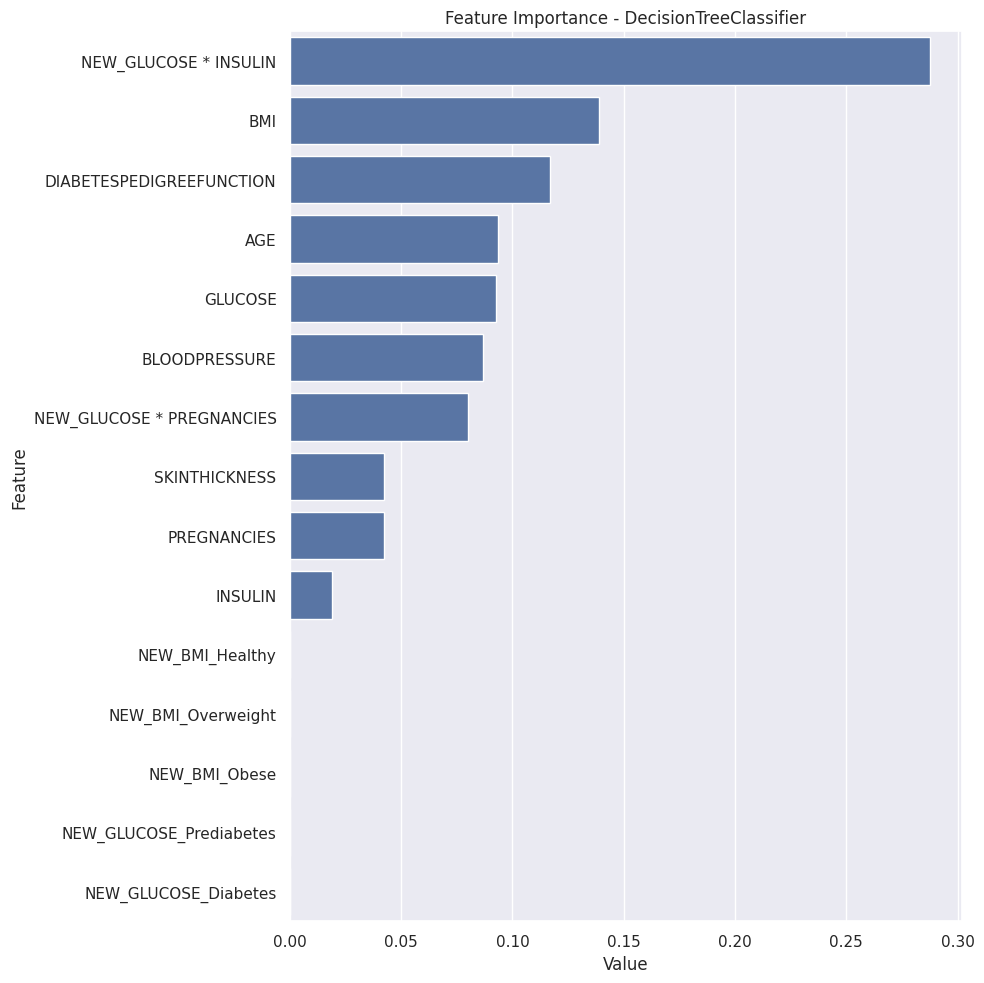

In [ ]:
plot_importance(dt_model, X)

# 20.5.1.Decision Tree Classifier Hyperparameter Optimization

In [ ]:
dt_model = DecisionTreeClassifier(random_state=46)
parameters = {'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, parameters, cv=5).fit(X_train, y_train)

best_dt_model = dt_grid.best_estimator_

print("Decision Tree Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Accuracy: {round(dt_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_dt_model.predict(X_test), y_test), 4)}")

Decision Tree Classifier - Hyperparameter Optimization
Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.7468
Recall: 0.6667
Precision: 0.4198
F1: 0.5152
AUC: 0.7028


# 20.6.AdaBoost Classifier

In [ ]:
ada_model = AdaBoostClassifier(random_state=46).fit(X_train, y_train)

ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")

AdaBoost Classifier:
Accuracy: 0.7359
Recall: 0.6429
Precision: 0.5556
F1: 0.596
AUC: 0.7096


# 20.6.1.AdaBoost Classifier Hyperparameter Optimization

In [ ]:
ada_model = AdaBoostClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
ada_grid = GridSearchCV(ada_model, parameters, cv=5).fit(X_train, y_train)

best_ada_model = ada_grid.best_estimator_

print("AdaBoost Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {ada_grid.best_params_}")
print(f"Accuracy: {round(ada_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_ada_model.predict(X_test), y_test), 4)}")

AdaBoost Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Accuracy: 0.7729
Recall: 0.6429
Precision: 0.5556
F1: 0.596
AUC: 0.7096


# 20.7.Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier(random_state=46).fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")

Gradient Boosting Classifier:
Accuracy: 0.7403
Recall: 0.6296
Precision: 0.6296
F1: 0.6296
AUC: 0.7148


In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

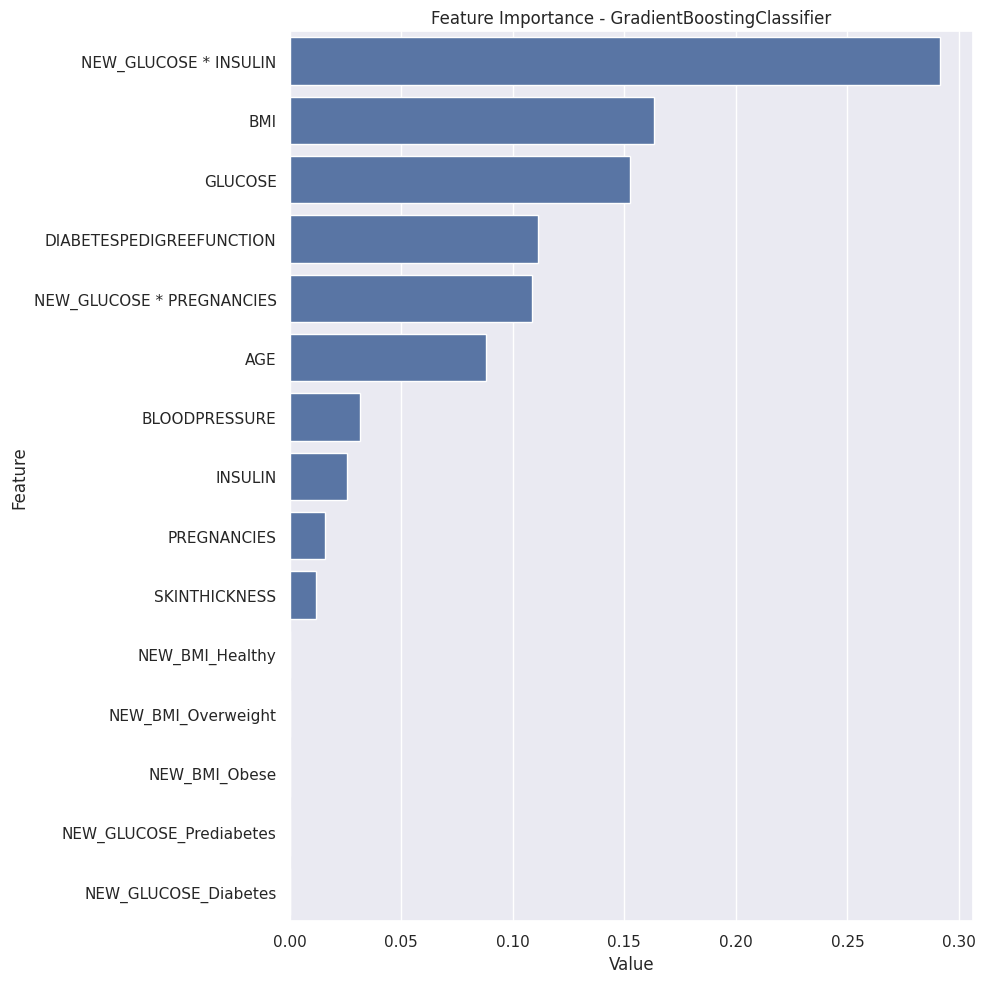

In [ ]:
plot_importance(gb_model, X)

# 20.7.1.Gradient Boosting Classifier Hyperparameter Optimization

In [ ]:
gb_model = GradientBoostingClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb_model, parameters, cv=5).fit(X_train, y_train)

best_gb_model = gb_grid.best_estimator_

print("Gradient Boosting Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Accuracy: {round(gb_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_gb_model.predict(X_test), y_test), 4)}")

Gradient Boosting Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.7673
Recall: 0.6296
Precision: 0.6296
F1: 0.6296
AUC: 0.7148


# 20.8.XGBoost Classifier

In [ ]:
xgb_model = XGBClassifier(random_state=46).fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")

XGBoost Classifier:
Accuracy: 0.7576
Recall: 0.6582
Precision: 0.642
F1: 0.65
AUC: 0.7337


In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

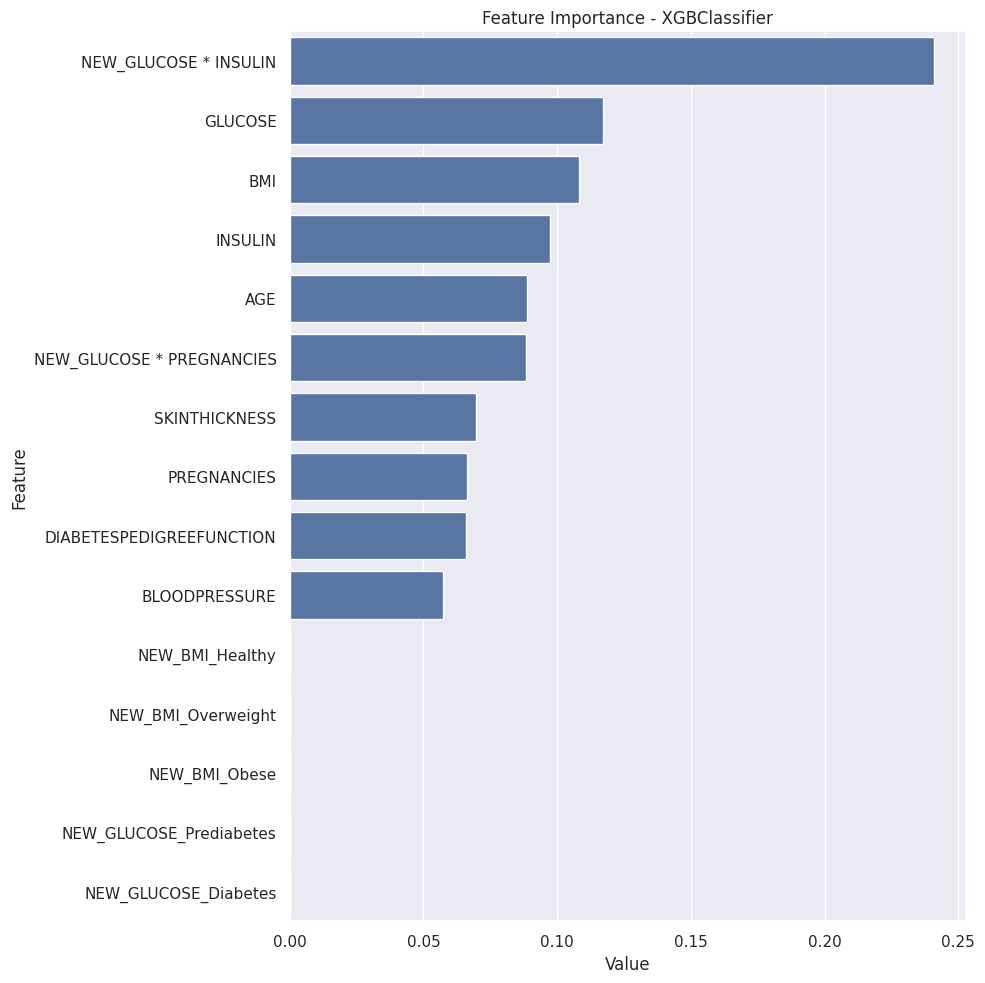

In [ ]:
plot_importance(xgb_model, X)

# 20.8.1.XGBoost Classifier Hyperparameter Optimization

menggunakan versi standalone dari XGBoost yang tidak bergantung pada Scikit-learn untuk proses tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Inisialisasi DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameter
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'eval_metric': 'auc'
}

# Cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics='auc', as_pandas=True)

# Output AUC
print(cv_results)


    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0            0.919          0.006          0.797         0.016
1            0.933          0.003          0.794         0.024
2            0.943          0.005          0.800         0.026
3            0.952          0.007          0.813         0.017
4            0.957          0.008          0.819         0.017
..             ...            ...            ...           ...
95           1.000          0.000          0.813         0.013
96           1.000          0.000          0.813         0.014
97           1.000          0.000          0.813         0.015
98           1.000          0.000          0.814         0.014
99           1.000          0.000          0.813         0.014

[100 rows x 4 columns]


# 20.9.LightGBM Classifier

In [ ]:
lgbm_model = LGBMClassifier(random_state=46).fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

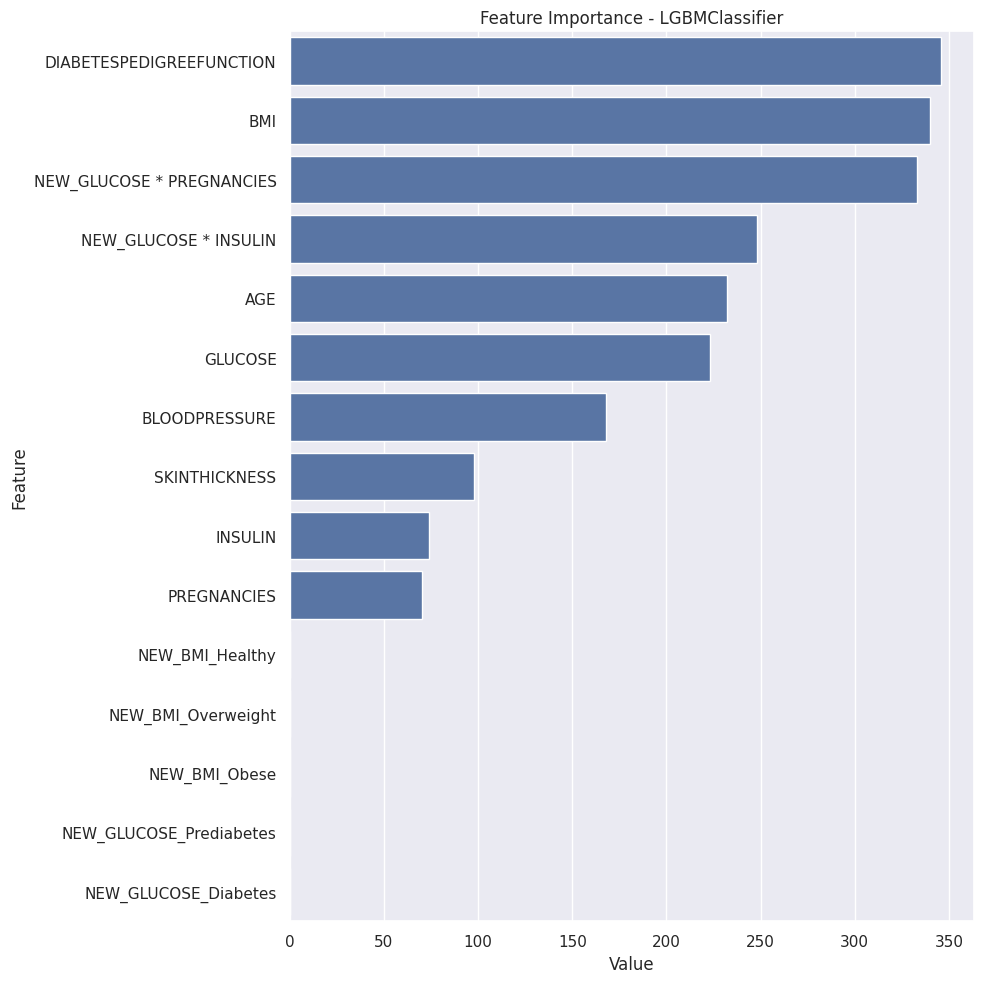

In [ ]:
plot_importance(lgbm_model, X)

# 20.9.1.LightGBM Classifier Hyperparameter Optimization

In [ ]:

lgbm_model = LGBMClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
lgbm_grid = GridSearchCV(lgbm_model, parameters, cv=5).fit(X_train, y_train)

best_lgbm_model = lgbm_grid.best_estimator_

print("LightGBM Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {lgbm_grid.best_params_}")
print(f"Accuracy: {round(lgbm_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_lgbm_model.predict(X_test), y_test), 4)}")

Output streaming akan dipotong hingga 5000 baris terakhir.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

# 20.10.Comparison of Metrics for Different Models After Feature Engineering

In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7749, 0.7532, 0.7792, 0.7792, 0.7229, 0.7662, 0.7532, 0.7879, 0.7662],
    "Recall": [0.7101, 0.6875, 0.7027, 0.7419, 0.5955, 0.6957, 0.6667, 0.7105, 0.7015],
    "Precision": [0.6049, 0.5432, 0.642, 0.5679, 0.6543, 0.5926, 0.5926, 0.6667, 0.5802],
    "F1": [0.6533, 0.6069, 0.671, 0.6434, 0.6235, 0.64, 0.6275, 0.6879, 0.6351],
    "AUC": [0.7563, 0.733, 0.759, 0.7674, 0.6992, 0.746, 0.7296, 0.7682, 0.7471]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)


# 20.11.Comparison of Metrics for Different Models After Hyperparameter Optimization

In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7749, 0.7654, 0.7487, 0.7691, 0.7188, 0.745, 0.771, 0.758, 0.7487],
    "Recall": [0.6986, 0.6875, 0.6986, 0.7049, 0.618, 0.7, 0.6901, 0.6835, 0.6579],
    "Precision": [0.6296, 0.5432, 0.6296, 0.5309, 0.679, 0.6049, 0.6049, 0.6667, 0.6173],
    "F1": [0.6623, 0.6069, 0.6623, 0.6056, 0.6471, 0.649, 0.6447, 0.675, 0.6369],
    "AUC": [0.7544, 0.733, 0.7544, 0.7407, 0.7174, 0.7506, 0.7451, 0.753, 0.7289]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Hyperparameter Optimization"
)

# Displaying the graph
fig.show(block=True)


# 20.12.Comparison of Metrics Before and After Hyperparameter Optimization

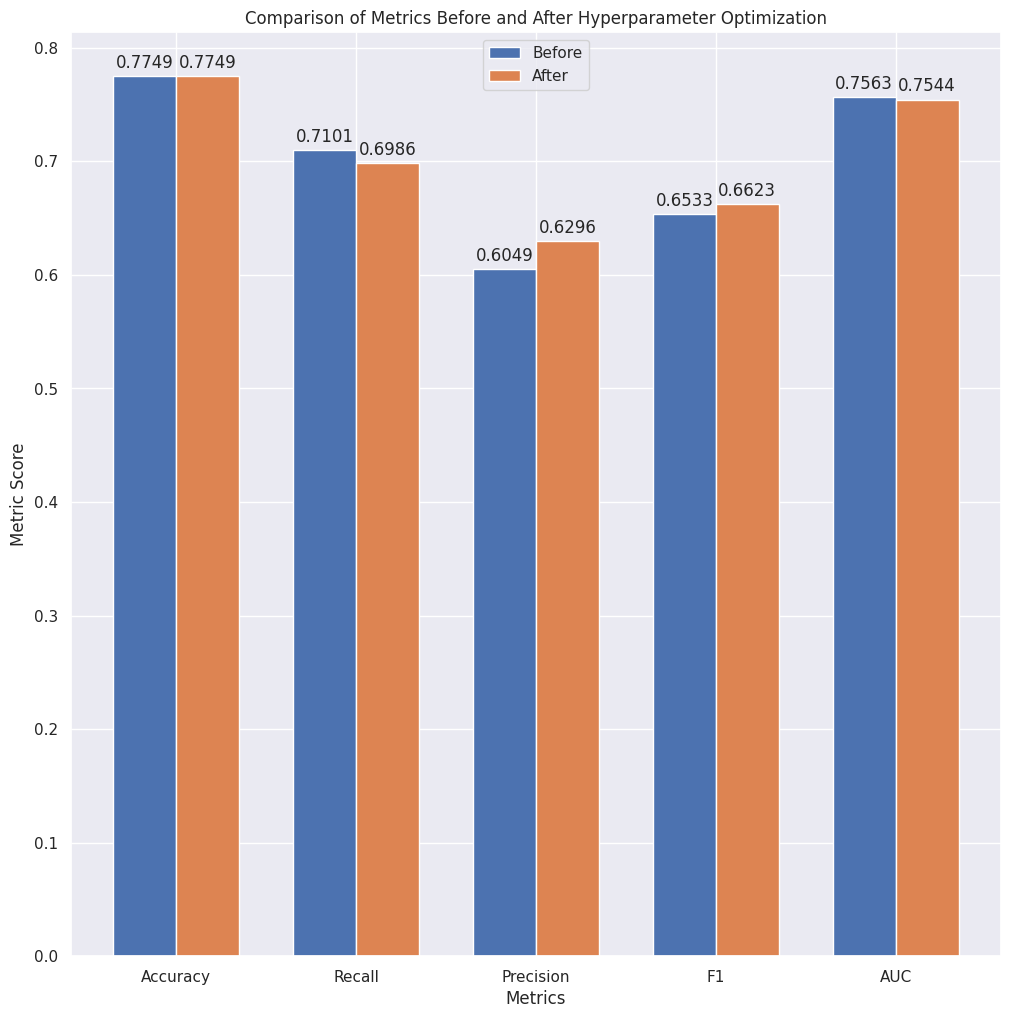

In [ ]:
# Metric names
metrics = ["Accuracy", "Recall", "Precision", "F1", "AUC"]

# Metric values before hyperparameter optimization
before_values = [0.7749, 0.7101, 0.6049, 0.6533, 0.7563]

# Metric values after hyperparameter optimization
after_values = [0.7749, 0.6986, 0.6296, 0.6623, 0.7544]

# Index for the x-axis
x = np.arange(len(metrics))

# Width of the bars
width = 0.35

# Creating the figure and axes
fig, ax = plt.subplots()

# Plotting the bars for before values
rects1 = ax.bar(x - width/2, before_values, width, label='Before')

# Plotting the bars for after values
rects2 = ax.bar(x + width/2, after_values, width, label='After')

# Setting labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Score')
ax.set_title('Comparison of Metrics Before and After Hyperparameter Optimization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to attach the metric values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{round(height, 4)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Attaching metric values on top of the bars
autolabel(rects1)
autolabel(rects2)

# Displaying the plot
plt.show()
